In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.tree import DecisionTreeRegressor

In [ ]:
!pip install -q yfinance

In [ ]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime

In [ ]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 13, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]


for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2010-11-22,10.952857,11.191429,10.923929,11.191429,9.486750,393075200,APPLE
2010-11-23,11.087500,11.133929,10.948571,11.026071,9.346576,519447600,APPLE
2010-11-24,11.142857,11.264286,11.133929,11.242857,9.530343,413725200,APPLE
2010-11-26,11.205000,11.346429,11.176429,11.250000,9.536396,237585600,APPLE
2010-11-29,11.267857,11.338571,11.120714,11.316786,9.593012,445785200,APPLE
...,...,...,...,...,...,...,...
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500,AMAZON
2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,AMAZON
2023-11-20,145.130005,146.630005,144.729996,146.130005,146.130005,41951200,AMAZON


**DESCRIPTIVE ANALYSIS**

In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3273.000000,3273.000000,3273.000000,3273.000000,3273.000000,3.273000e+03
mean,62.344935,63.025041,61.700226,62.391159,60.326639,2.170813e+08
std,54.604531,55.244536,54.023497,54.664668,55.116028,1.911645e+08
min,10.952857,11.133929,10.923929,11.026071,9.346576,2.260726e+07
25%,22.084999,22.281429,21.812857,22.057858,18.900537,9.060150e+07
50%,36.375000,36.685001,36.095001,36.455002,34.214527,1.424924e+08
75%,112.370003,113.675003,110.000000,112.000000,109.866753,2.805988e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.880998e+09


In [ ]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3273.000000,3273.000000,3273.000000,3273.000000,3273.000000,3.273000e+03
mean,56.132697,56.722274,55.577570,56.162976,56.162976,5.048709e+07
std,38.843770,39.313580,38.424229,38.872896,38.872896,4.376233e+07
min,11.805749,11.973869,11.781341,11.827667,11.827667,1.584340e+05
25%,26.317745,26.515154,26.089373,26.324226,26.324226,2.485400e+07
50%,46.030499,46.299000,45.593498,46.014500,46.014500,3.381270e+07
75%,75.763000,76.562599,75.230003,75.907501,75.907501,6.466548e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,5.638536e+08


In [ ]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3273.000000,3273.000000,3273.000000,3273.000000,3273.000000,3.273000e+03
mean,119.315240,120.505924,118.095394,119.357585,114.078530,3.547932e+07
std,100.468901,101.538093,99.366844,100.494134,101.218772,1.943933e+07
min,23.750000,24.010000,23.650000,23.709999,18.587626,7.425600e+06
25%,37.980000,38.299999,37.720001,38.049999,32.144775,2.313040e+07
50%,68.970001,69.440002,68.500000,69.080002,63.658051,3.028500e+07
75%,208.820007,211.130005,206.500000,208.699997,202.222183,4.252550e+07
max,378.000000,379.789886,374.964996,378.715393,378.715393,3.193179e+08


In [ ]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3273.000000,3273.000000,3273.000000,3273.000000,3273.000000,3.273000e+03
mean,66.588022,67.363232,65.739854,66.566529,66.566529,8.205258e+07
std,54.273576,54.933253,53.548964,54.233937,54.233937,4.450832e+07
min,8.059500,8.177000,8.029500,8.048500,8.048500,1.762600e+07
25%,15.721500,15.888500,15.564000,15.706500,15.706500,5.404400e+07
50%,47.724998,48.020000,47.250000,47.682999,47.682999,7.024800e+07
75%,102.070000,103.489998,100.883003,102.300003,102.300003,9.565800e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.826840e+08


**INFO ABOUT THE DATASET**

In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2010-11-22 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3273 non-null   float64
 1   High          3273 non-null   float64
 2   Low           3273 non-null   float64
 3   Close         3273 non-null   float64
 4   Adj Close     3273 non-null   float64
 5   Volume        3273 non-null   int64  
 6   company_name  3273 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 204.6+ KB


In [ ]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2010-11-22 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3273 non-null   float64
 1   High          3273 non-null   float64
 2   Low           3273 non-null   float64
 3   Close         3273 non-null   float64
 4   Adj Close     3273 non-null   float64
 5   Volume        3273 non-null   int64  
 6   company_name  3273 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 204.6+ KB


In [ ]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2010-11-22 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3273 non-null   float64
 1   High          3273 non-null   float64
 2   Low           3273 non-null   float64
 3   Close         3273 non-null   float64
 4   Adj Close     3273 non-null   float64
 5   Volume        3273 non-null   int64  
 6   company_name  3273 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 204.6+ KB


In [ ]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2010-11-22 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3273 non-null   float64
 1   High          3273 non-null   float64
 2   Low           3273 non-null   float64
 3   Close         3273 non-null   float64
 4   Adj Close     3273 non-null   float64
 5   Volume        3273 non-null   int64  
 6   company_name  3273 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 204.6+ KB


**ADDING MORE FEATURES LIKE MOVING AVERGAE AND DAILY RETURN**

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

**PLOT**

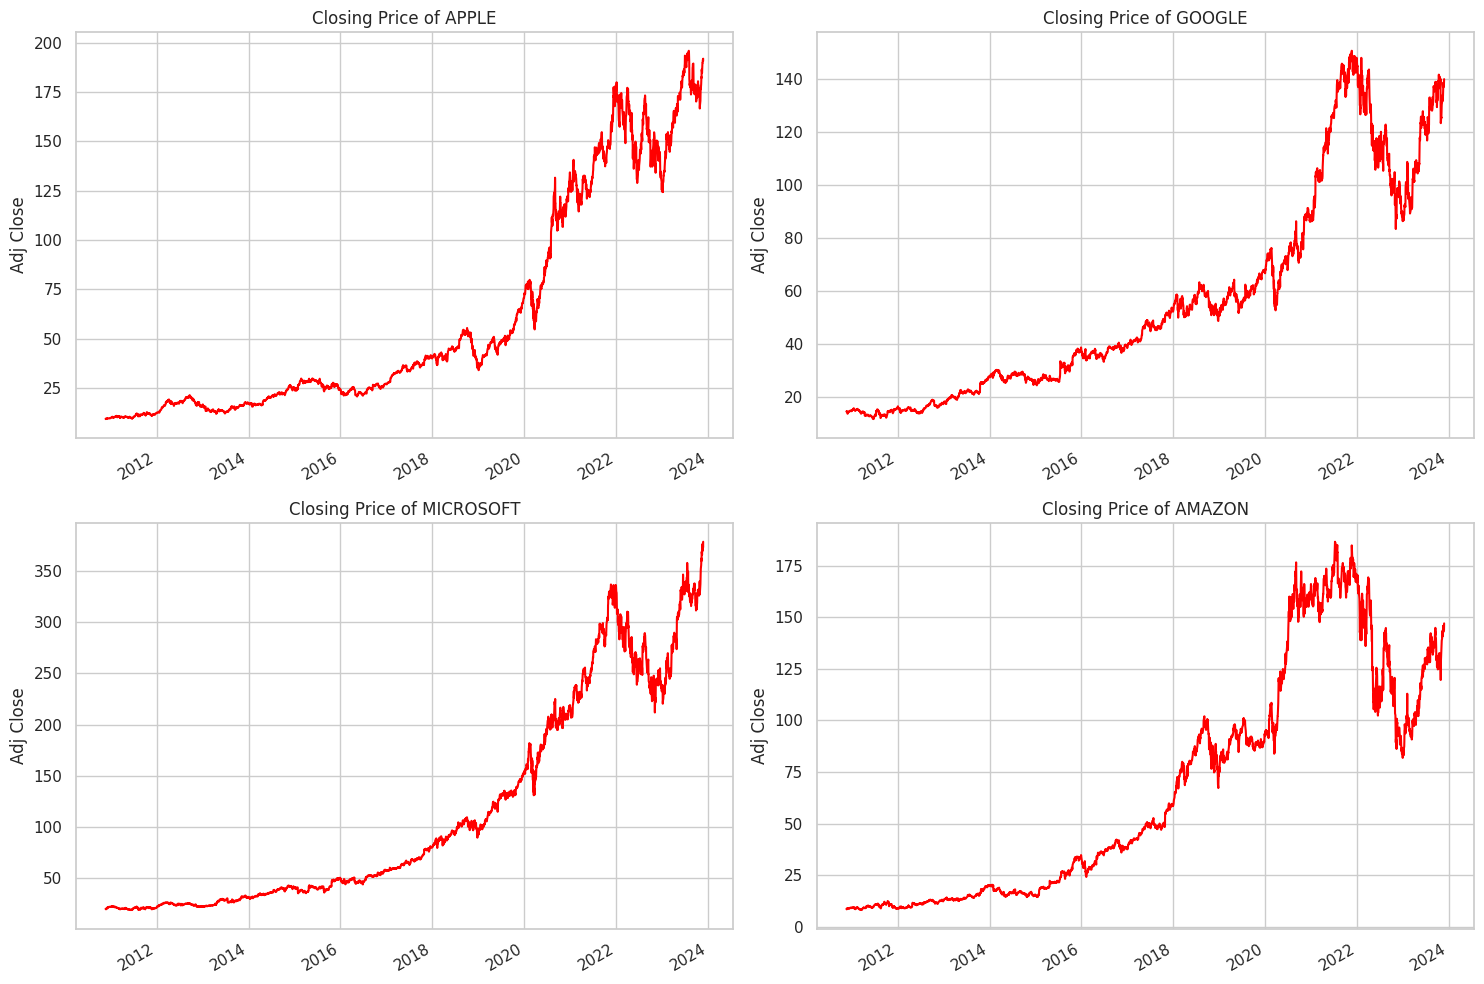

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='red')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
plt.tight_layout()

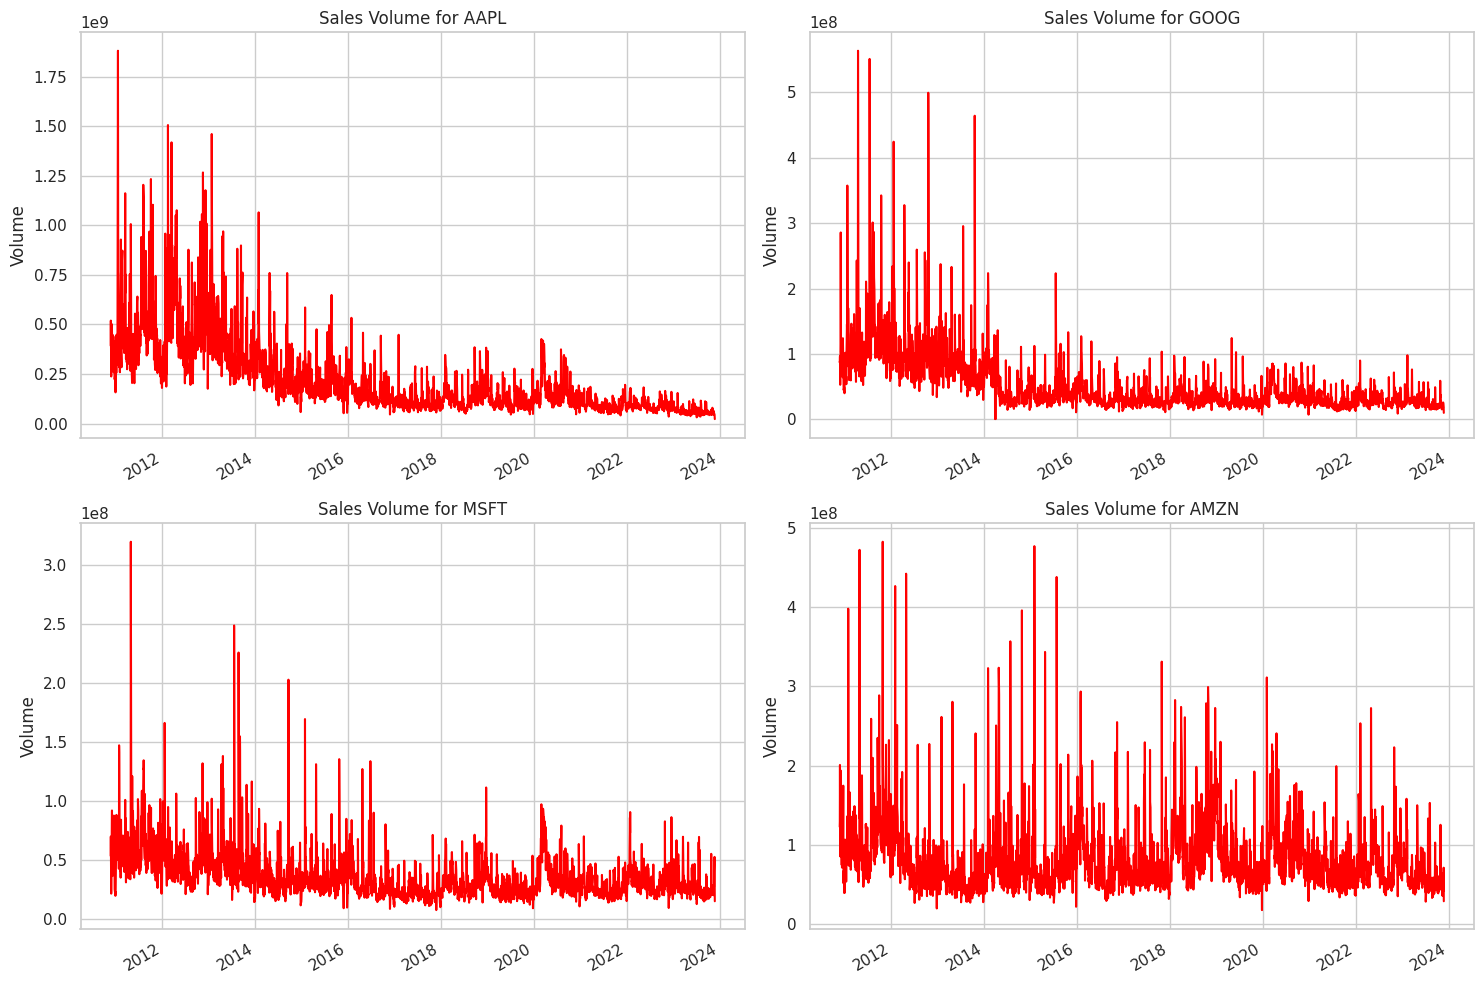

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='red')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
plt.tight_layout()

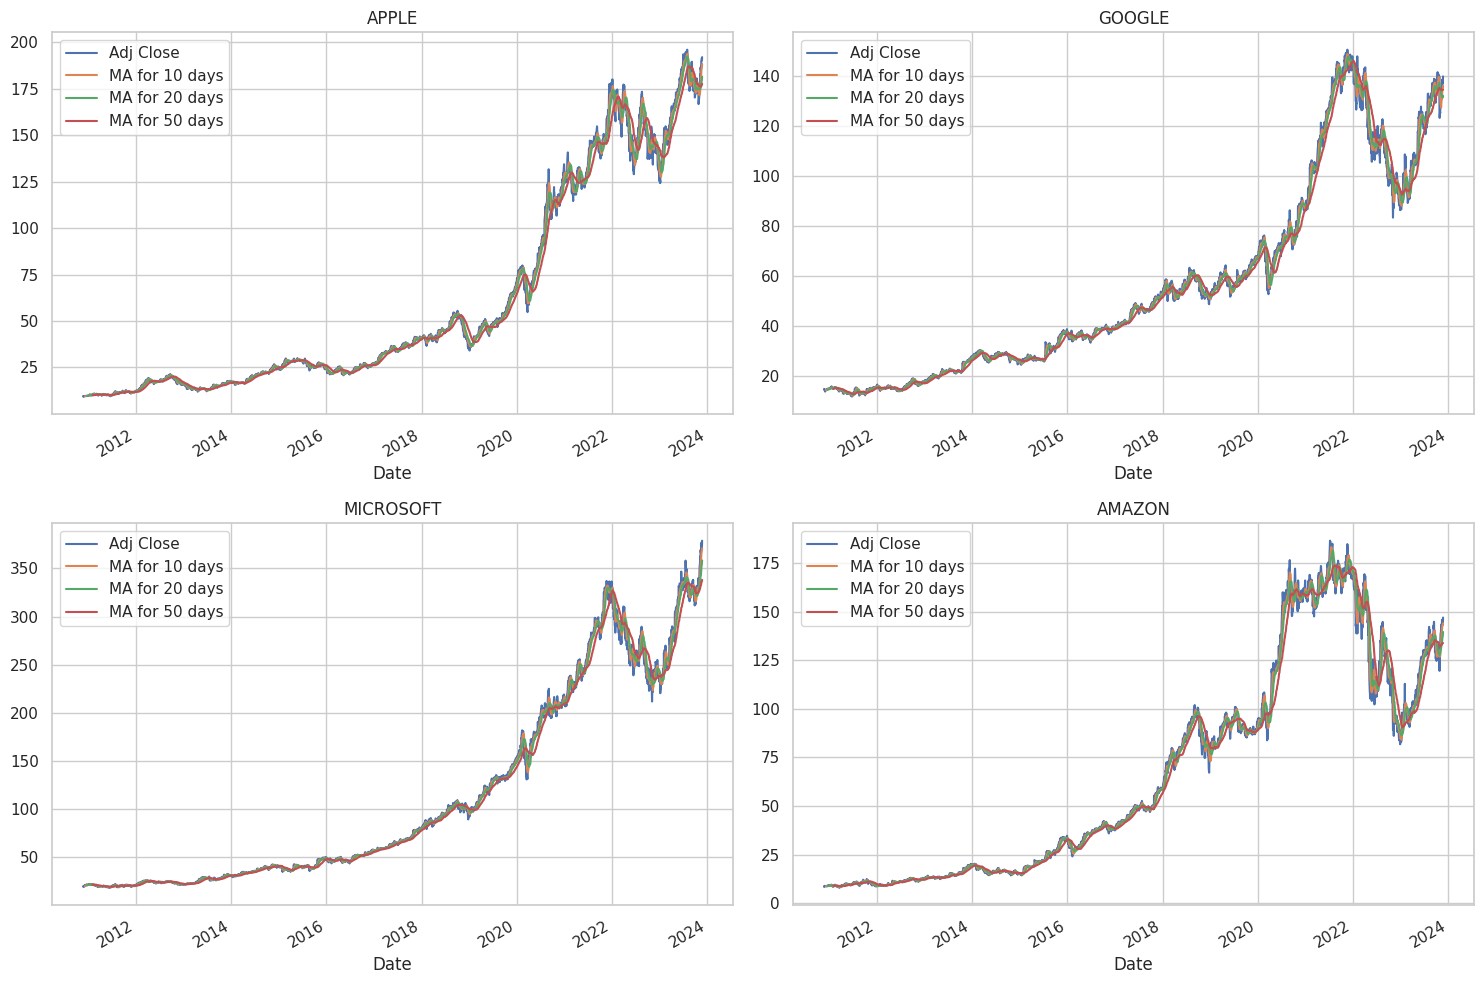

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
fig.tight_layout()

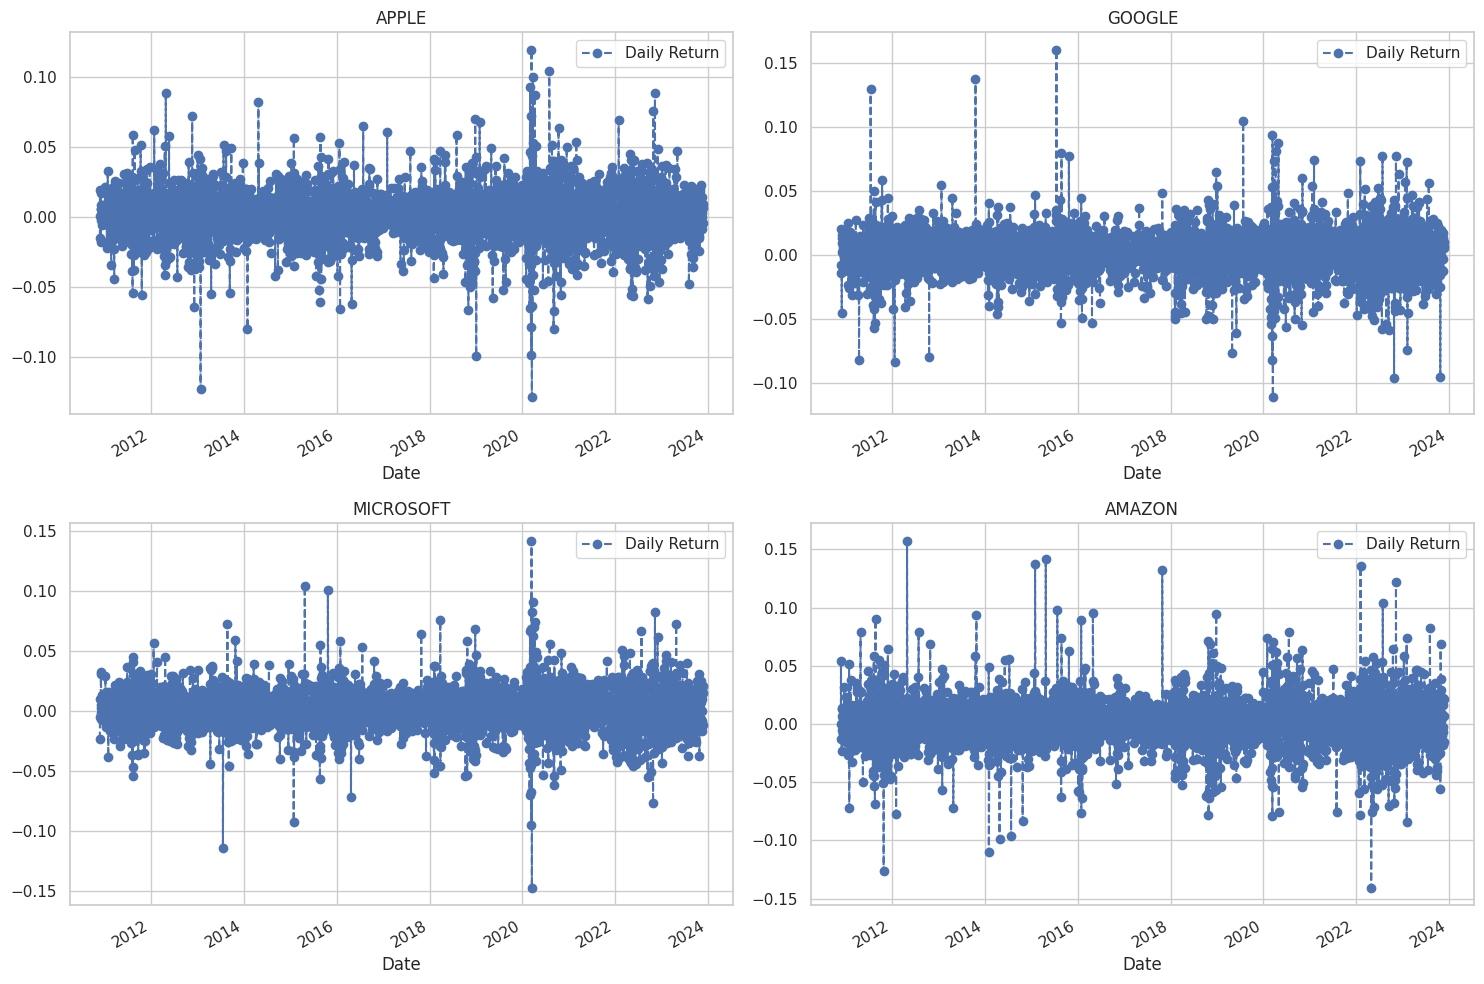

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()

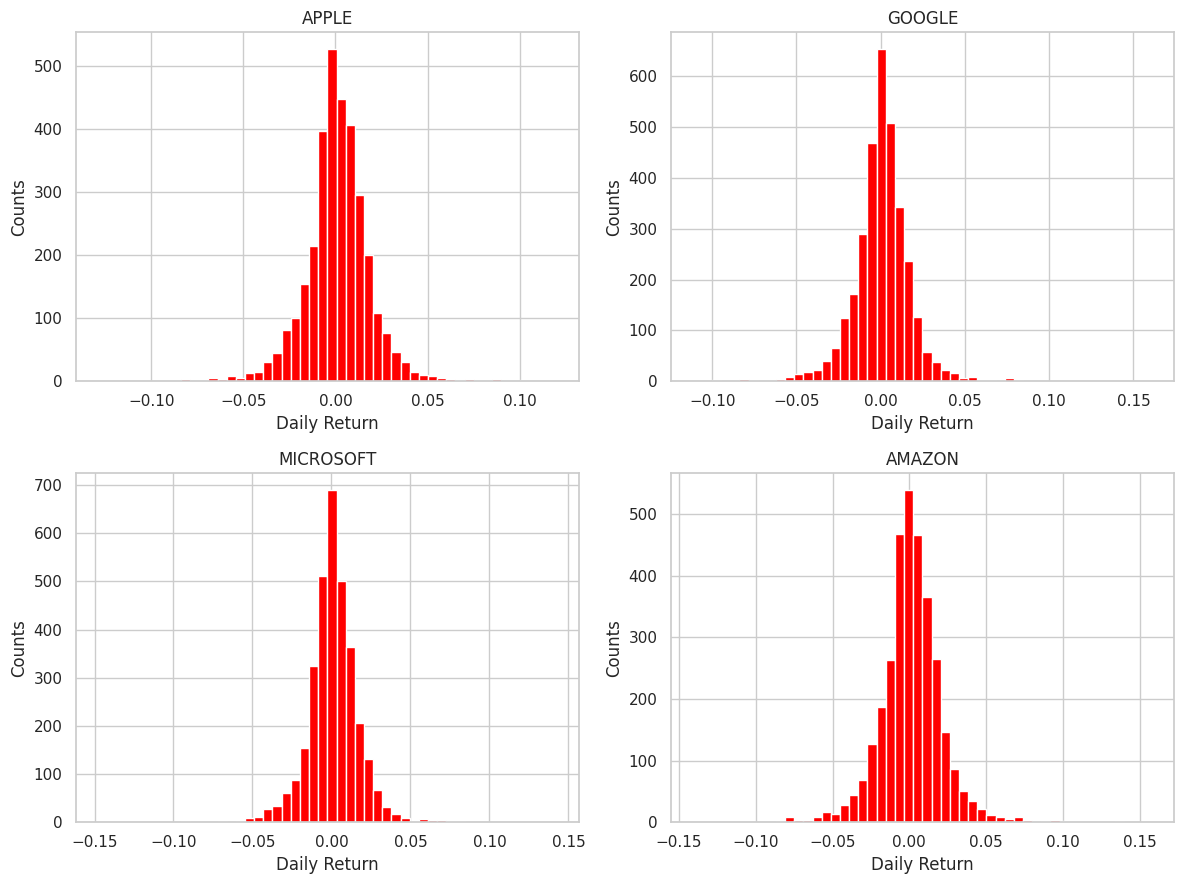

In [ ]:
plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50,color='red')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-11-22,NaN,NaN,NaN,NaN
2010-11-23,-0.014775,-0.012853,-0.013887,-0.023708
2010-11-24,0.019662,0.053805,0.020514,0.009952
2010-11-26,0.000635,-0.000282,-0.008353,-0.004730
2010-11-29,0.005936,0.012923,-0.013373,0.002376


Text(0.5, 1.0, 'Correlation of stock closing price')

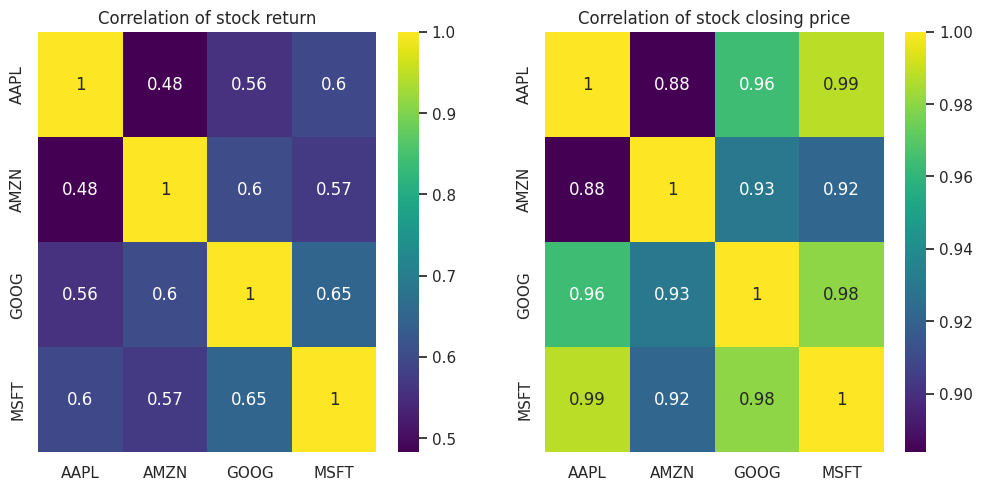

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='viridis')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation of stock closing price')

**ANALYZING THE RISK ASSOCIATED WITH EACH STOCK**

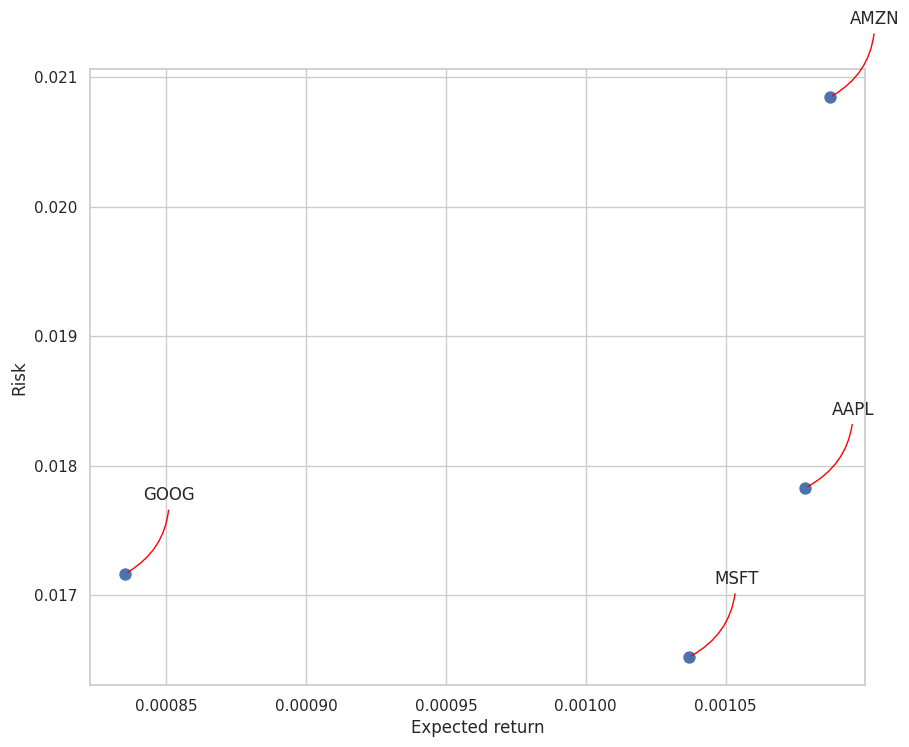

In [ ]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='red', connectionstyle='arc3,rad=-0.3'))

**ADDING MORE FEATURES LIKE THE PREVIOUS 3 CLOSING PRICES**

In [ ]:
MSFT['Close1'] = MSFT['Close']
MSFT['Close_2'] = MSFT['Close'].shift(1)
MSFT['Close_3'] = MSFT['Close'].shift(2)
MSFT['Next_Day_Closing_Price'] = MSFT['Close'].shift(-1)
MSFT = MSFT.drop(columns = ['company_name'])
MSFT = MSFT.dropna()
MSFT

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return,Close1,Close_2,Close_3,Next_Day_Closing_Price
Date,,,,,,,,,,,,,,
2011-02-02,27.930000,28.110001,27.879999,27.940001,21.633270,45824000,21.854710,21.918976,21.376053,-0.001786,27.940001,27.990000,27.730000,27.650000
2011-02-03,27.969999,27.969999,27.540001,27.650000,21.408730,60340100,21.800511,21.905427,21.405786,-0.010379,27.650000,27.940001,27.990000,27.770000
2011-02-04,27.700001,27.840000,27.510000,27.770000,21.501644,40412200,21.781155,21.864777,21.446822,0.004340,27.770000,27.650000,27.940001,28.200001
2011-02-07,27.799999,28.340000,27.790001,28.200001,21.834579,68980900,21.767218,21.849291,21.490646,0.015484,28.200001,27.770000,27.650000,28.280001
2011-02-08,28.100000,28.340000,28.049999,28.280001,21.896519,34904200,21.754055,21.851614,21.537568,0.002837,28.280001,28.200001,27.770000,27.969999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-15,371.279999,373.130005,367.109985,369.670013,369.670013,26860100,361.177966,347.135954,333.875557,0.000406,369.670013,370.269989,366.679993,376.170013
2023-11-16,370.959991,376.350006,370.179993,376.170013,376.170013,27182300,364.033521,349.412010,334.814122,0.017583,376.170013,369.670013,370.269989,369.850006
2023-11-17,373.609985,374.369995,367.000000,369.850006,369.850006,40157000,365.809982,351.604094,335.539265,-0.016801,369.850006,376.170013,369.670013,377.440002


In [ ]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return,Close1,Close_2,Close_3,Next_Day_Closing_Price
count,3223.000000,3223.000000,3223.000000,3223.000000,3223.000000,3.223000e+03,3223.000000,3223.000000,3223.000000,3223.000000,3223.000000,3223.000000,3223.000000,3223.000000
mean,120.630683,121.835365,119.395485,120.672110,115.405878,3.515915e+07,114.916798,114.394073,112.935606,0.001021,120.672110,120.565042,120.456537,120.780945
std,100.498538,101.570372,99.395904,100.524277,101.242348,1.915572e+07,100.795345,100.355241,99.287019,0.016574,100.524277,100.439101,100.350370,100.613695
min,23.750000,24.010000,23.650000,23.709999,18.587626,7.425600e+06,18.782835,18.968634,19.458329,-0.147390,23.709999,23.709999,23.709999,23.709999
25%,39.945000,40.230000,39.619999,39.865000,33.892382,2.310255e+07,33.839383,33.855509,32.834003,-0.007054,39.865000,39.845001,39.825001,39.889999
50%,70.540001,71.099998,69.940002,70.529999,65.159248,3.008630e+07,65.031761,64.844217,63.925519,0.000681,70.529999,70.410004,70.320000,70.650002
75%,210.479996,212.465004,208.095001,210.355003,204.318512,4.188175e+07,203.397414,203.436331,204.162376,0.009439,210.355003,210.305000,210.195000,210.385002
max,375.670013,378.869995,371.119995,377.440002,377.440002,3.193179e+08,369.300226,356.203922,337.182396,0.142169,377.440002,377.440002,376.170013,378.715393


**CORRELATION HEATMAP FOR MICROSOFT STOCKS**

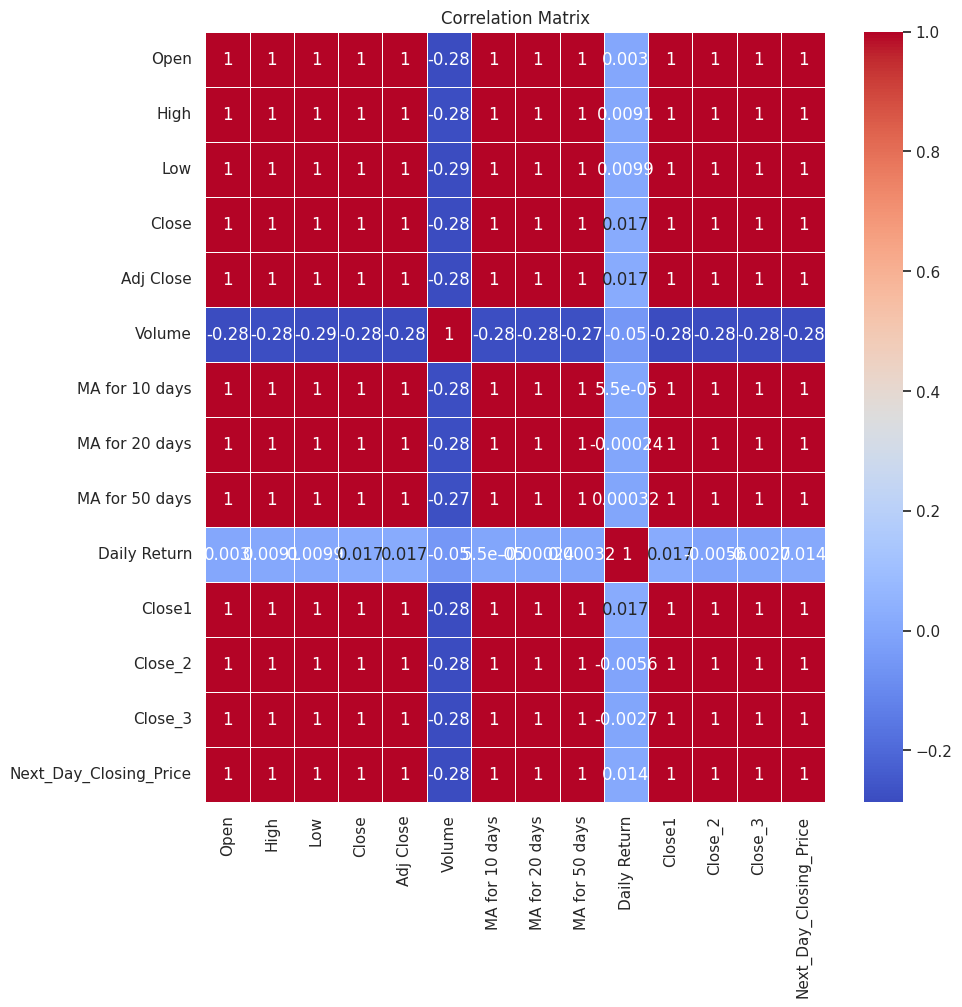

In [ ]:
correlation_matrix = MSFT.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

**STANDARDIZING THE DATASET AND APPLYING K MEANS CLUSTERING**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
columns_to_standardize = ['Open', 'High', 'Low', 'Close', 'Volume','Daily Return','Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days', 'Close1', 'Close_2', 'Close_3']
MSFT_standardized=MSFT[columns_to_standardize]
y = MSFT['Next_Day_Closing_Price']

In [ ]:
scaler = StandardScaler()
MSFT_standardized[columns_to_standardize] = scaler.fit_transform(MSFT_standardized[columns_to_standardize])
MSFT_standardized


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Open,High,Low,Close,Volume,Daily Return,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Close1,Close_2,Close_3
Date,,,,,,,,,,,,,
2011-02-02,-0.922551,-0.922906,-0.920860,-0.922628,0.556831,-0.169370,-0.926363,-0.923421,-0.921620,-0.922314,-0.922628,-0.921846,-0.924171
2011-02-03,-0.922153,-0.924285,-0.924281,-0.925513,1.314744,-0.687913,-0.928581,-0.923959,-0.921756,-0.922014,-0.925513,-0.922344,-0.921580
2011-02-04,-0.924840,-0.925565,-0.924583,-0.924319,0.274271,0.200303,-0.927663,-0.924151,-0.922161,-0.921601,-0.924319,-0.925232,-0.922078
2011-02-07,-0.923845,-0.920641,-0.921765,-0.920041,1.765896,0.872775,-0.924374,-0.924289,-0.922315,-0.921159,-0.920041,-0.924037,-0.924969
2011-02-08,-0.920860,-0.920641,-0.919149,-0.919245,-0.013312,0.109590,-0.923762,-0.924420,-0.922292,-0.920687,-0.919245,-0.919755,-0.923773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-15,2.494446,2.474478,2.492587,2.477377,-0.433309,-0.037089,2.511830,2.443559,2.319540,2.225611,2.477377,2.486519,2.454018
2023-11-16,2.491262,2.506185,2.523478,2.542048,-0.416486,0.999439,2.576043,2.471894,2.342224,2.235065,2.542048,2.480544,2.489799
2023-11-17,2.517634,2.486688,2.491480,2.479168,0.260947,-1.075407,2.513608,2.489521,2.364070,2.242370,2.479168,2.545270,2.483819


In [ ]:
columns_for_kmeans =['Open', 'High', 'Low', 'Close','Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days', 'Close1', 'Close_2', 'Close_3']
Dataset=MSFT[columns_for_kmeans]
scaler = StandardScaler()
Dataset[columns_for_kmeans] = scaler.fit_transform(Dataset[columns_for_kmeans])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(Dataset[columns_for_kmeans])

cluster_labels = kmeans.labels_
Dataset['Cluster'] = cluster_labels

print("Data points in each cluster:")
print(Dataset['Cluster'].value_counts())

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Data points in each cluster:
3    1696
1     618
2     490
0     419
Name: Cluster, dtype: int64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


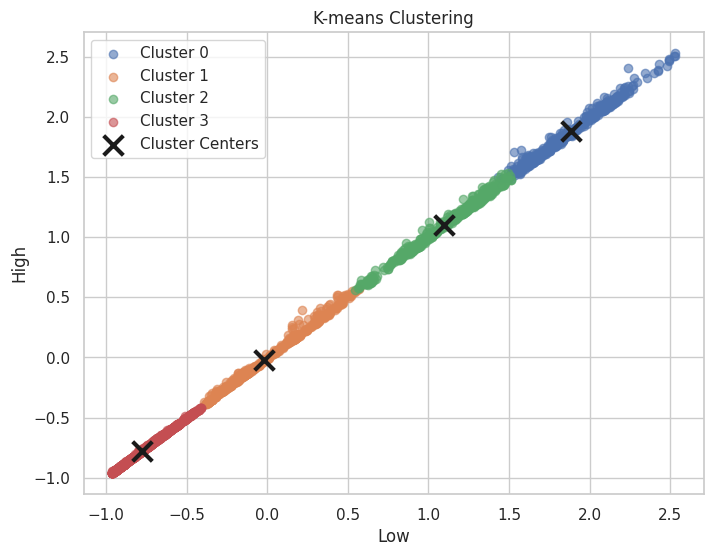

In [ ]:
feature1 = 'Low'
feature2 = 'High'

plt.figure(figsize=(8, 6))

for cluster_label in range(num_clusters):
    cluster_data = Dataset[Dataset['Cluster'] == cluster_label]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster_label}', alpha=0.6)

cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, columns_to_standardize.index(feature1)],
            cluster_centers[:, columns_to_standardize.index(feature2)],
            marker='x', s=200, linewidths=3, color='k', label='Cluster Centers')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-means Clustering')
plt.legend()
plt.show()


**OUTLIER DETECTION USING BOX PLOTS**

Open
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


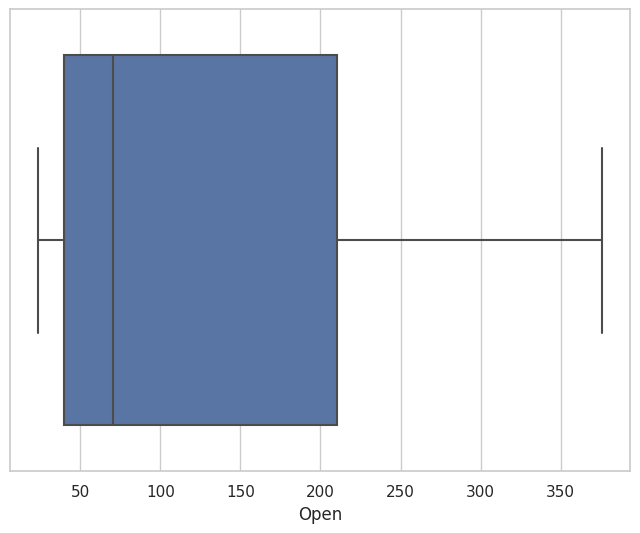

High
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


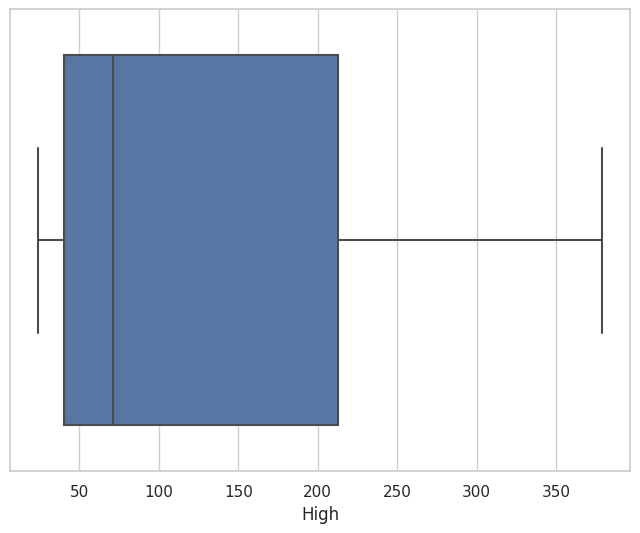

Low
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


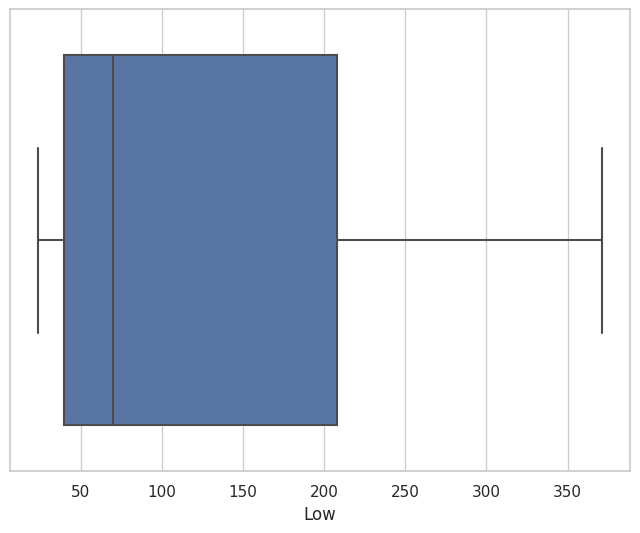

Close
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


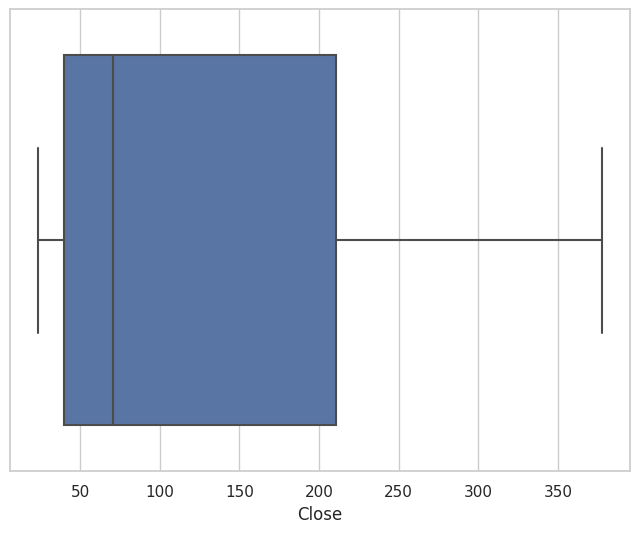

Adj Close
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


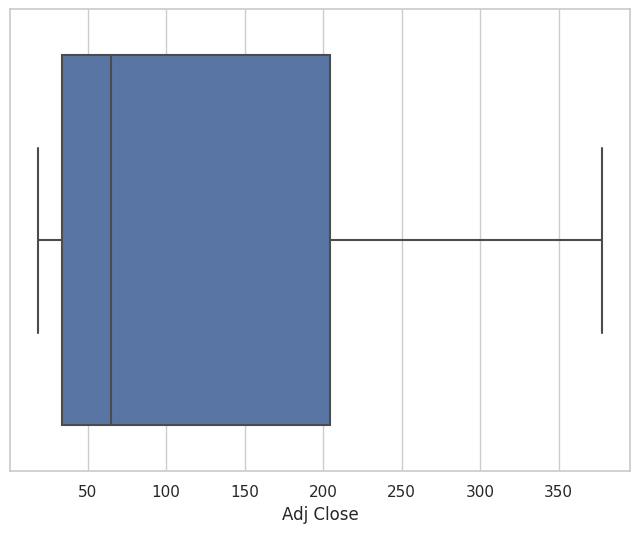

Volume
Number of outliers: 147
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-02-10   27.930000   27.940001   27.290001   27.500000   21.292591   
2011-02-11   27.760000   27.809999   27.070000   27.250000   21.099020   
2011-02-16   27.049999   27.070000   26.600000   27.020000   21.044590   
2011-03-04   26.219999   26.240000   25.799999   25.950001   20.211212   
2011-03-15   25.080000   25.469999   25.000000   25.389999   19.775059   
...                ...         ...         ...         ...         ...   
2022-01-24  292.200012  297.109985  276.049988  296.369995  291.038116   
2022-01-25  291.519989  294.989990  285.170013  288.489990  283.299896   
2022-01-26  307.989990  308.500000  293.029999  296.709991  291.372009   
2022-10-26  231.169998  238.300003  230.059998  231.320007  228.642593   
2022-12-16  248.550003  249.839996  243.509995  244.690002  242.539444   

      

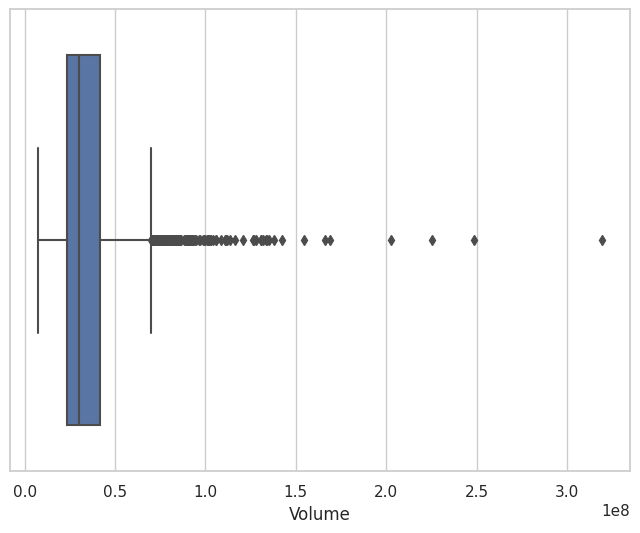

MA for 10 days
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


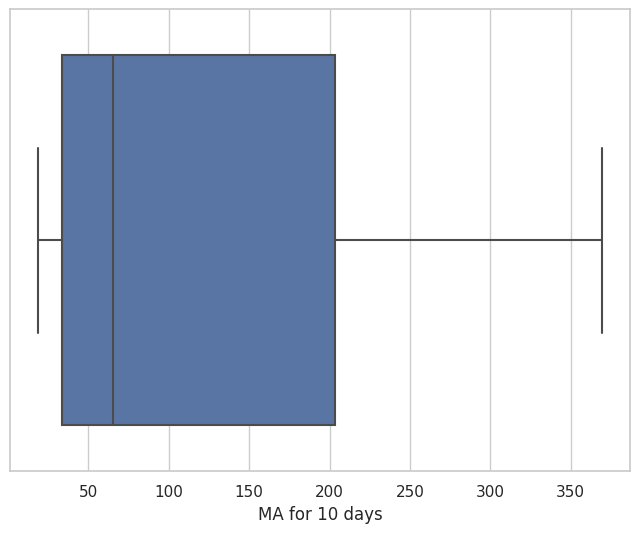

MA for 20 days
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


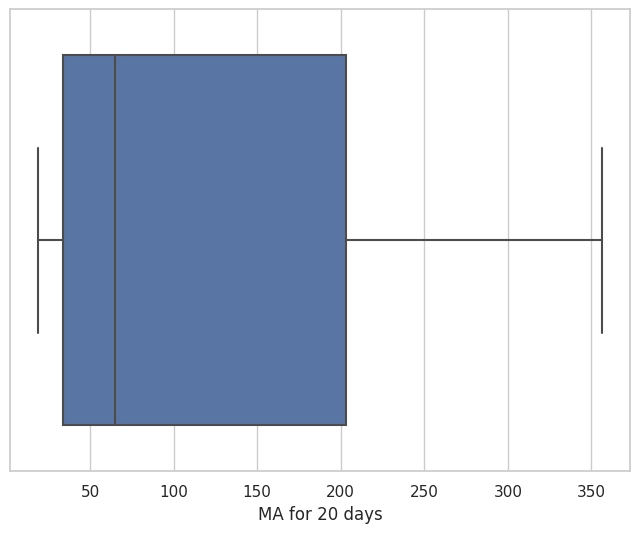

MA for 50 days
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


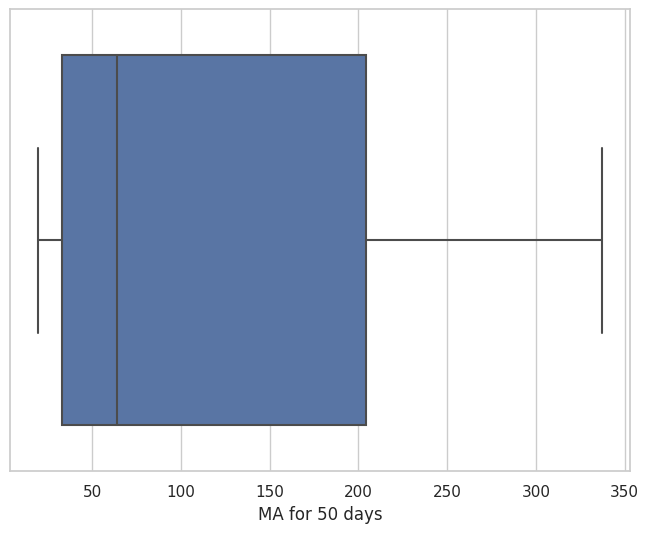

Daily Return
Number of outliers: 156
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-06-27   24.230000   25.459999   24.230000   25.200001   19.755726   
2011-07-19   26.809999   27.639999   26.780001   27.540001   21.590187   
2011-08-04   26.530001   26.870001   25.930000   25.940001   20.335855   
2011-08-08   25.020000   25.600000   24.389999   24.480000   19.191278   
2011-08-09   24.709999   25.620001   24.030001   25.580000   20.053633   
...                ...         ...         ...         ...         ...   
2023-04-26  296.700012  299.570007  292.730011  295.369995  293.507294   
2023-05-25  323.239990  326.899994  320.000000  325.920013  324.572632   
2023-07-18  345.829987  366.779999  342.170013  359.489990  358.003845   
2023-07-26  341.440002  344.670013  333.109985  337.769989  336.373657   
2023-10-26  340.540009  341.630005  326.940002  327.890015  327.225861   



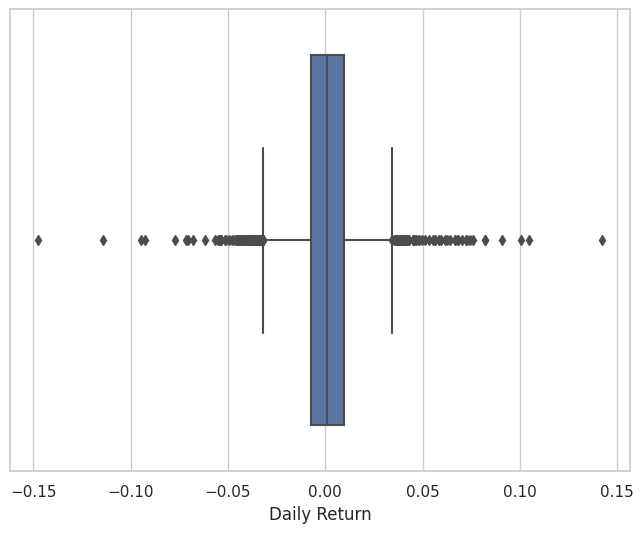

Close1
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


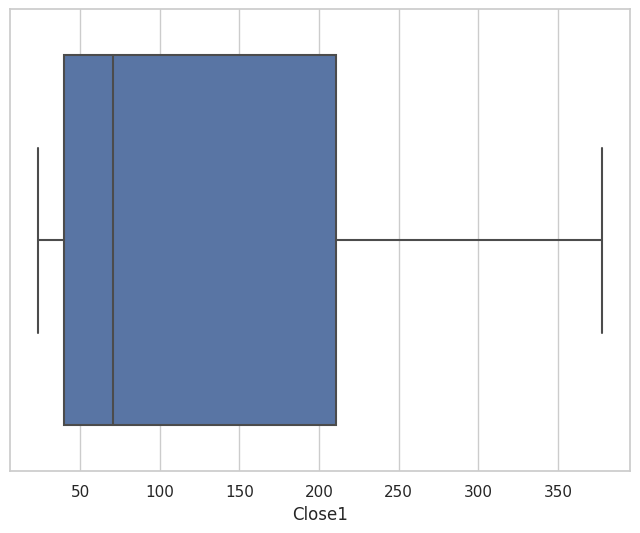

Close_2
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


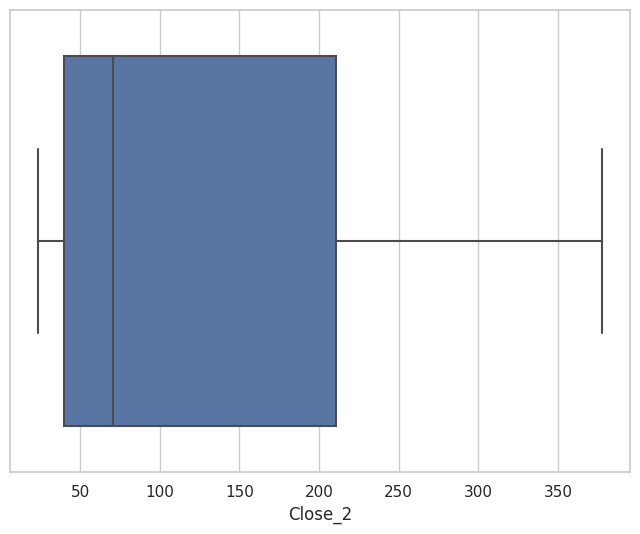

Close_3
Number of outliers: 0
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, MA for 10 days, MA for 20 days, MA for 50 days, Daily Return, Close1, Close_2, Close_3, Next_Day_Closing_Price]
Index: []


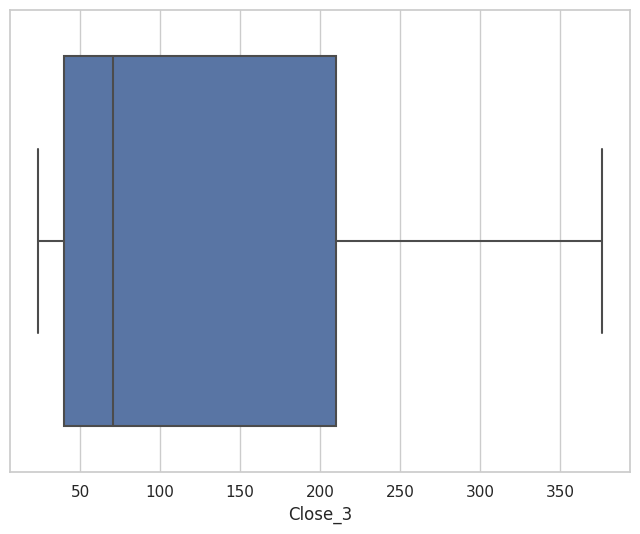

In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days','MA for 20 days','MA for 50 days','Daily Return', 'Close1', 'Close_2', 'Close_3']

for column_name in columns:
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))

    sns.boxplot(x=MSFT[f'{column_name}'])

    Q1 = MSFT[f'{column_name}'].quantile(0.25)
    Q3 = MSFT[f'{column_name}'].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = MSFT[(MSFT[f'{column_name}'] < lower_bound) | (MSFT[f'{column_name}'] > upper_bound)]

    print(f'{column_name}')
    print("Number of outliers:", len(outliers))
    print(outliers)

    plt.show()


**NAIVE-BAYES**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
MSFT_standardized

,Open,High,Low,Close,Volume,Daily Return,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Close1,Close_2,Close_3
Date,,,,,,,,,,,,,
2011-02-02,-0.922551,-0.922906,-0.920860,-0.922628,0.556831,-0.169370,-0.926363,-0.923421,-0.921620,-0.922314,-0.922628,-0.921846,-0.924171
2011-02-03,-0.922153,-0.924285,-0.924281,-0.925513,1.314744,-0.687913,-0.928581,-0.923959,-0.921756,-0.922014,-0.925513,-0.922344,-0.921580
2011-02-04,-0.924840,-0.925565,-0.924583,-0.924319,0.274271,0.200303,-0.927663,-0.924151,-0.922161,-0.921601,-0.924319,-0.925232,-0.922078
2011-02-07,-0.923845,-0.920641,-0.921765,-0.920041,1.765896,0.872775,-0.924374,-0.924289,-0.922315,-0.921159,-0.920041,-0.924037,-0.924969
2011-02-08,-0.920860,-0.920641,-0.919149,-0.919245,-0.013312,0.109590,-0.923762,-0.924420,-0.922292,-0.920687,-0.919245,-0.919755,-0.923773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-15,2.494446,2.474478,2.492587,2.477377,-0.433309,-0.037089,2.511830,2.443559,2.319540,2.225611,2.477377,2.486519,2.454018
2023-11-16,2.491262,2.506185,2.523478,2.542048,-0.416486,0.999439,2.576043,2.471894,2.342224,2.235065,2.542048,2.480544,2.489799
2023-11-17,2.517634,2.486688,2.491480,2.479168,0.260947,-1.075407,2.513608,2.489521,2.364070,2.242370,2.479168,2.545270,2.483819


In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Cluster'

X = MSFT_standardized[features]
y2 = Dataset[target]
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [ ]:
naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_train, y2_train)

predictions = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y2_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y2_test, predictions))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.96      1.00      0.98       116
           2       0.99      1.00      0.99        90
           3       1.00      0.99      0.99       362

    accuracy                           0.99       645
   macro avg       0.99      0.99      0.99       645
weighted avg       0.99      0.99      0.99       645



**LINEAR REGRESSION**

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+02, tolerance: 1.335e+02
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.376e+02, tolerance: 1.344e+02
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.358e+02, tolerance: 1.348e+02
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.374e+02, tolerance: 1.374e+02
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+02, tolerance: 1.383e+02
Objective did n

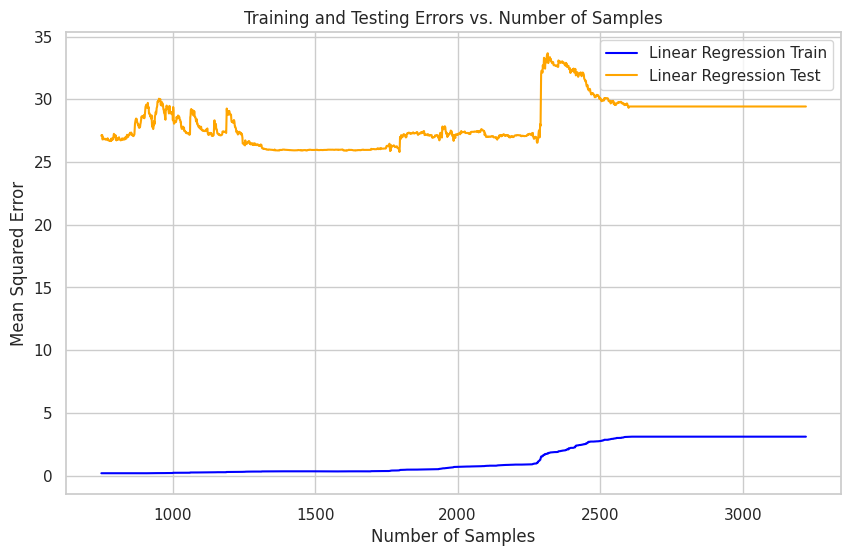

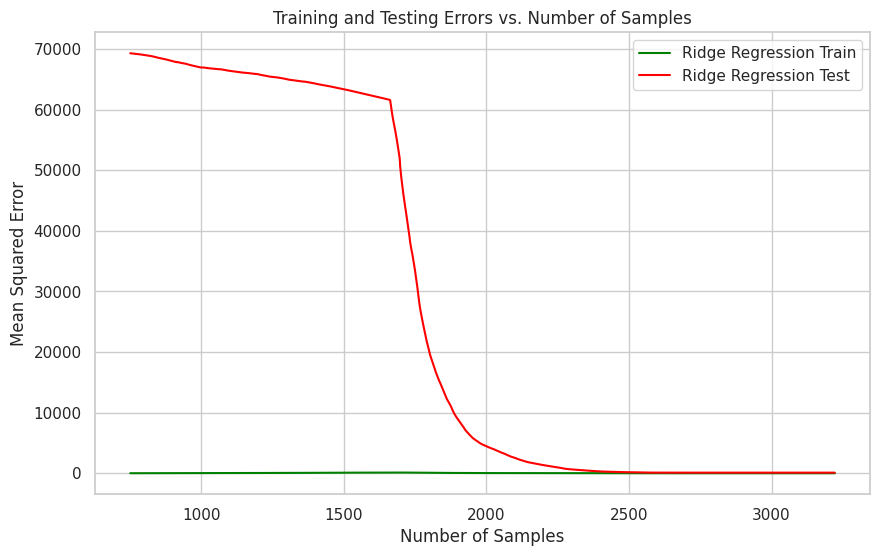

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Your feature and target variables
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Next_Day_Closing_Price'

# Create lists to store errors and sample sizes
train_errors_lr = []
test_errors_lr = []
train_errors_ridge = []
test_errors_ridge = []
sample_sizes = []

X_test_data=MSFT_standardized[features][2601:]
Y_test_data=MSFT[target][2601:]

X_train_data=MSFT_standardized[features][:2601]
Y_train_data=MSFT[target][:2601]


for sample_size in range(750, len(MSFT_standardized), 1):
    sample_sizes.append(sample_size)
    X_train = X_train_data[:sample_size]
    y_train = Y_train_data[:sample_size]


    # Linear Regression model
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, y_train)
    predictions_lr_train = linear_regression_model.predict(X_train)
    predictions_lr_test = linear_regression_model.predict(X_test_data)

    # Ridge Regression model
    ridge_reg = Lasso(alpha=1.5)
    ridge_reg.fit(X_train, y_train)
    predictions_ridge_train = ridge_reg.predict(X_train)
    predictions_ridge_test = ridge_reg.predict(X_test_data)

    # Calculate errors and append to lists
    train_errors_lr.append(mean_squared_error(y_train, predictions_lr_train))
    test_errors_lr.append(mean_squared_error(Y_test_data, predictions_lr_test))
    train_errors_ridge.append(mean_squared_error(y_train, predictions_ridge_train))
    test_errors_ridge.append(mean_squared_error(Y_test_data, predictions_ridge_test))

# Plotting the errors as a function of sample size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_errors_lr, label='Linear Regression Train', color='blue')
plt.plot(sample_sizes, test_errors_lr, label='Linear Regression Test', color='orange')

plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors vs. Number of Samples')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_errors_ridge, label='Ridge Regression Train', color='green')
plt.plot(sample_sizes, test_errors_ridge, label='Ridge Regression Test', color='red')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors vs. Number of Samples')
plt.legend()
plt.grid(True)
plt.show()

Linear Regression:
Training Mean Squared Error: 0.89, R-squared: 1.00
Testing Mean Squared Error: 24.45, R-squared: 0.99

Ridge Regression:
Training Mean Squared Error: 0.94, R-squared: 1.00
Testing Mean Squared Error: 28.64, R-squared: 0.99


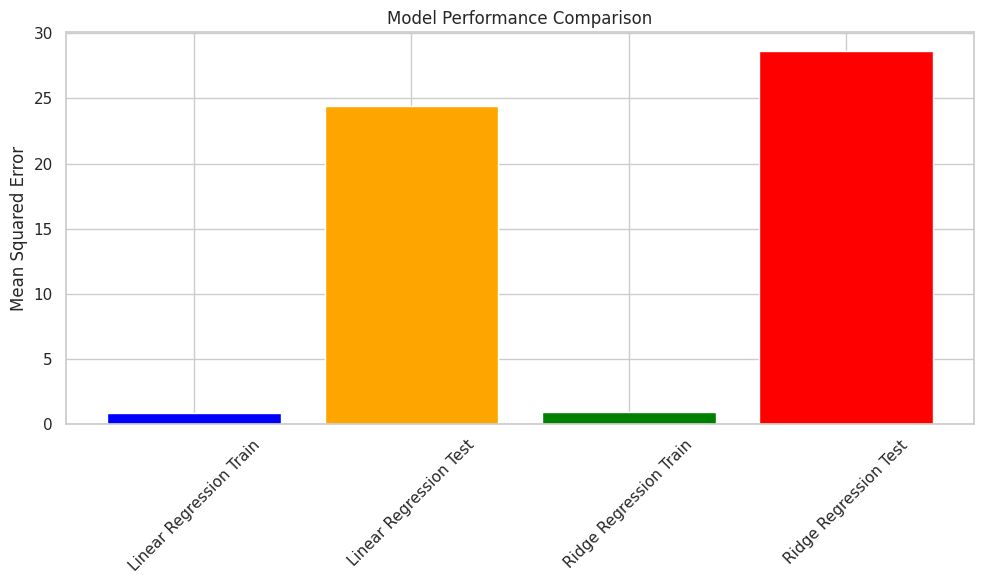

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Your feature and target variables
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Next_Day_Closing_Price'

# Splitting the data into training and testing sets
train_size = int(0.7 * len(MSFT_standardized))
X_train = MSFT_standardized[features][:train_size]
X_test = MSFT_standardized[features][train_size:]
y_train = MSFT[target][:train_size]
y_test = MSFT[target][train_size:]

# Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
predictions_lr_train = linear_regression_model.predict(X_train)
predictions_lr_test = linear_regression_model.predict(X_test)

# Ridge Regression model
ridge_reg = Ridge(alpha=1.5)
ridge_reg.fit(X_train, y_train)
predictions_ridge_train = ridge_reg.predict(X_train)
predictions_ridge_test = ridge_reg.predict(X_test)

# Calculate errors
mse_lr_train = mean_squared_error(y_train, predictions_lr_train)
r2_lr_train = r2_score(y_train, predictions_lr_train)
mse_lr_test = mean_squared_error(y_test, predictions_lr_test)
r2_lr_test = r2_score(y_test, predictions_lr_test)

mse_ridge_train = mean_squared_error(y_train, predictions_ridge_train)
r2_ridge_train = r2_score(y_train, predictions_ridge_train)
mse_ridge_test = mean_squared_error(y_test, predictions_ridge_test)
r2_ridge_test = r2_score(y_test, predictions_ridge_test)

# Print the results
print('Linear Regression:')
print(f'Training Mean Squared Error: {mse_lr_train:.2f}, R-squared: {r2_lr_train:.2f}')
print(f'Testing Mean Squared Error: {mse_lr_test:.2f}, R-squared: {r2_lr_test:.2f}')

print('\nRidge Regression:')
print(f'Training Mean Squared Error: {mse_ridge_train:.2f}, R-squared: {r2_ridge_train:.2f}')
print(f'Testing Mean Squared Error: {mse_ridge_test:.2f}, R-squared: {r2_ridge_test:.2f}')

# Plotting the errors
plt.figure(figsize=(10, 6))
models = ['Linear Regression Train', 'Linear Regression Test', 'Ridge Regression Train', 'Ridge Regression Test']
errors = [mse_lr_train, mse_lr_test, mse_ridge_train, mse_ridge_test]
plt.bar(models, errors, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge , Lasso


features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Next_Day_Closing_Price'

X = MSFT_standardized[features]
y = MSFT[target]

train_size = int(0.7 * len(X))

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

predictions = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Linear Regression:')
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


predictions = linear_regression_model.predict(X_train)

mse = mean_squared_error(y_train, predictions)
r2 = r2_score(y_train, predictions)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print()

ridge_reg = Ridge(alpha=1.5)

# Train the Ridge Regression model on the training data
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_train)

# Evaluate the Ridge Regression model's performance
mse_ridge = mean_squared_error(y_train, y_pred_ridge)
r2_ridge = r2_score(y_train, y_pred_ridge)

print('Ridge Regression:')
print(f'Mean Squared Error (MSE): {mse_ridge:.2f}')
print(f'R-squared (R2): {r2_ridge:.2f}')

# Make predictions on the test data
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the Ridge Regression model's performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error (MSE): {mse_ridge:.2f}')
print(f'R-squared (R2): {r2_ridge:.2f}')

Linear Regression:
Mean Squared Error: 24.45
R-squared Score: 0.99
Mean Squared Error: 0.89
R-squared Score: 1.00

Ridge Regression:
Mean Squared Error (MSE): 0.94
R-squared (R2): 1.00
Mean Squared Error (MSE): 28.64
R-squared (R2): 0.99


**SVR**

In [ ]:
from sklearn.svm import SVC
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Next_Day_Closing_Price'

X = MSFT_standardized[features]
y = np.where(MSFT['Next_Day_Closing_Price'].shift(-1) > MSFT['Next_Day_Closing_Price'], 1, 0)
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]
regressor = SVC(kernel='linear')
regressor.fit(X_train,y_train)

print(accuracy_score(regressor.predict(X_test),y_test))

0.5191313340227508


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Your feature and target variables
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Next_Day_Closing_Price'

# Create lists to store errors and sample sizes
train_errors_svm = []
test_errors_svm = []
sample_sizes = []

X_test_data=MSFT_standardized[features][2601:]
Y_test_data=MSFT[target][2601:]

X_train_data=MSFT_standardized[features][:2601]
Y_train_data=MSFT[target][:2601]


for sample_size in range(750, len(MSFT_standardized), 1):
    sample_sizes.append(sample_size)
    X_train = X_train_data[:sample_size]
    y_train = Y_train_data[:sample_size]

    # SVM regressor model
    svm_regressor = SVR(kernel='linear')
    svm_regressor.fit(X_train, y_train)
    predictions_svm_train = svm_regressor.predict(X_train)
    predictions_svm_test = svm_regressor.predict(X_test_data)

    # Calculate errors and append to lists
    train_errors_svm.append(mean_squared_error(y_train, predictions_svm_train))
    test_errors_svm.append(mean_squared_error(Y_test_data, predictions_svm_test))

# Plotting the errors as a function of sample size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_errors_svm, label='SVM Train', color='blue')
plt.plot(sample_sizes, test_errors_svm, label='SVM Test', color='orange')

plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')
plt.title('SVM Training and Testing Errors vs. Number of Samples')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Next_Day_Closing_Price'

X = MSFT_standardized[features]
y = MSFT[target]

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]
svm_regressor = SVR(kernel = 'linear')
svm_regressor.fit(X_train, y_train)
predictions = svm_regressor.predict(X_test)
r2_accuracy = r2_score(y_test, predictions)

print(f'R^2 Accuracy: {r2_accuracy:.2f}')

mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')

predictions = svm_regressor.predict(X_train)
r2_accuracy = r2_score(y_train, predictions)

print(f'R^2 Accuracy: {r2_accuracy:.2f}')

mse = mean_squared_error(y_train, predictions)

print(f'Mean Squared Error: {mse:.2f}')

ARIMA

In [ ]:
df = MSFT_standardized.asfreq('D')

In [ ]:
cols=['Close']
df1=df.loc[:,cols]
df1

,Close
Date,
2011-02-02,-0.922628
2011-02-03,-0.925513
2011-02-04,-0.924319
2011-02-05,NaN
2011-02-06,NaN
...,...
2023-11-17,2.479168
2023-11-18,NaN
2023-11-19,NaN


<Axes: xlabel='Date'>

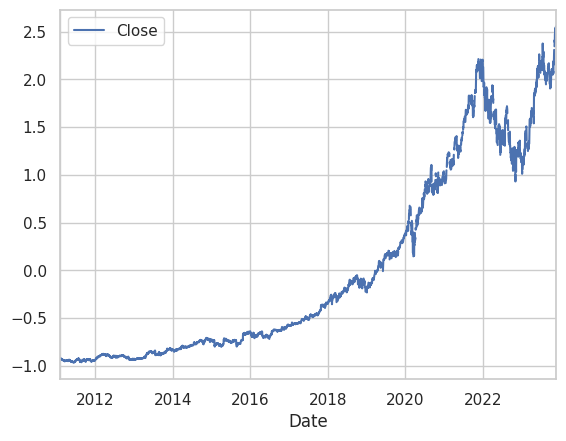

In [ ]:
df1.plot()

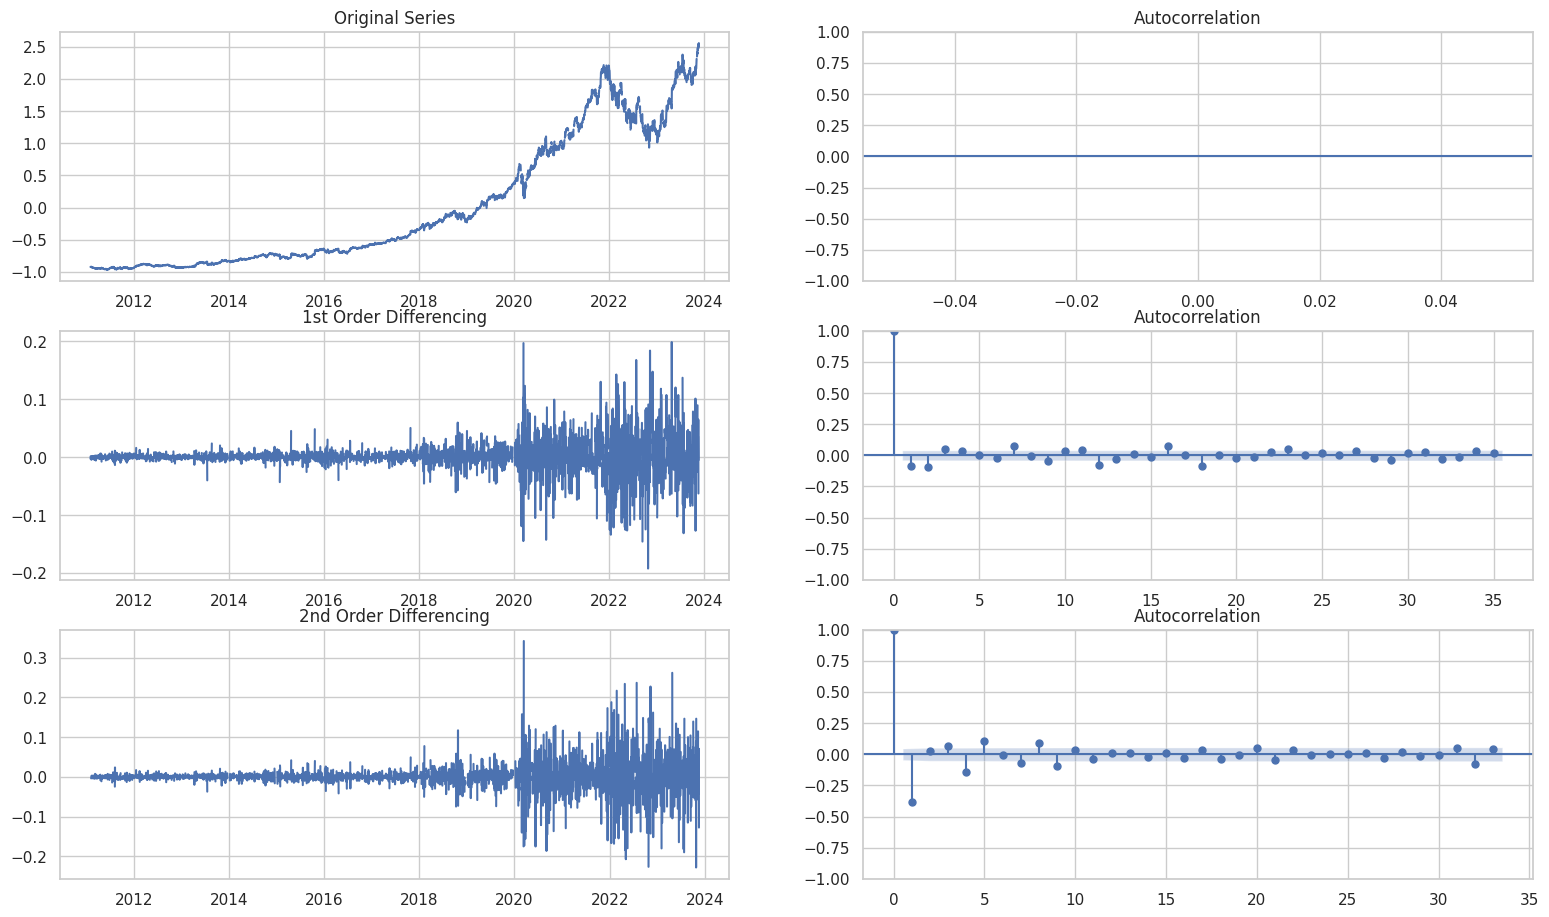

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(19, 11))
axes[0, 0].plot(df1)
axes[0, 0].set_title('Original Series')
plot_acf(df1, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df1.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

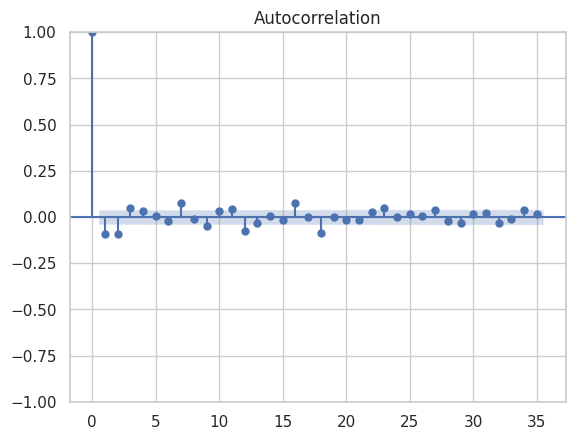

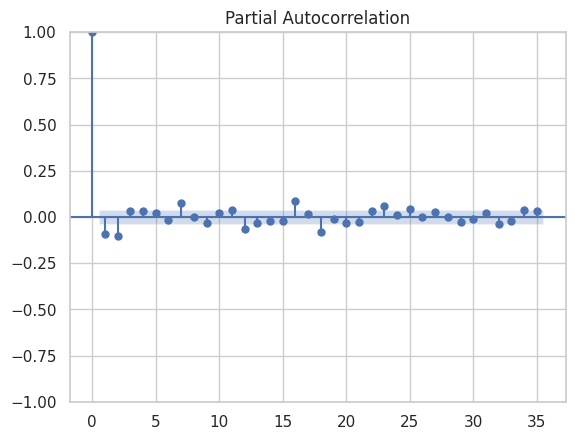

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
data_diff = df1['Close'].diff().dropna()
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()

In [ ]:
p, d, q = 0, 1, 1

model = ARIMA(df1['Close'], order=(p, d, q))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4676
Model:                 ARIMA(0, 1, 1)   Log Likelihood                6867.182
Date:                Wed, 22 Nov 2023   AIC                         -13730.364
Time:                        21:08:30   BIC                         -13717.464
Sample:                    02-02-2011   HQIC                        -13725.827
                         - 11-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2140      0.008    -26.227      0.000      -0.230      -0.198
sigma2         0.0007   7.22e-06     94.997      0.000       0.001       0.001
Ljung-Box (L1) (Q):                  19.38   Jarque-

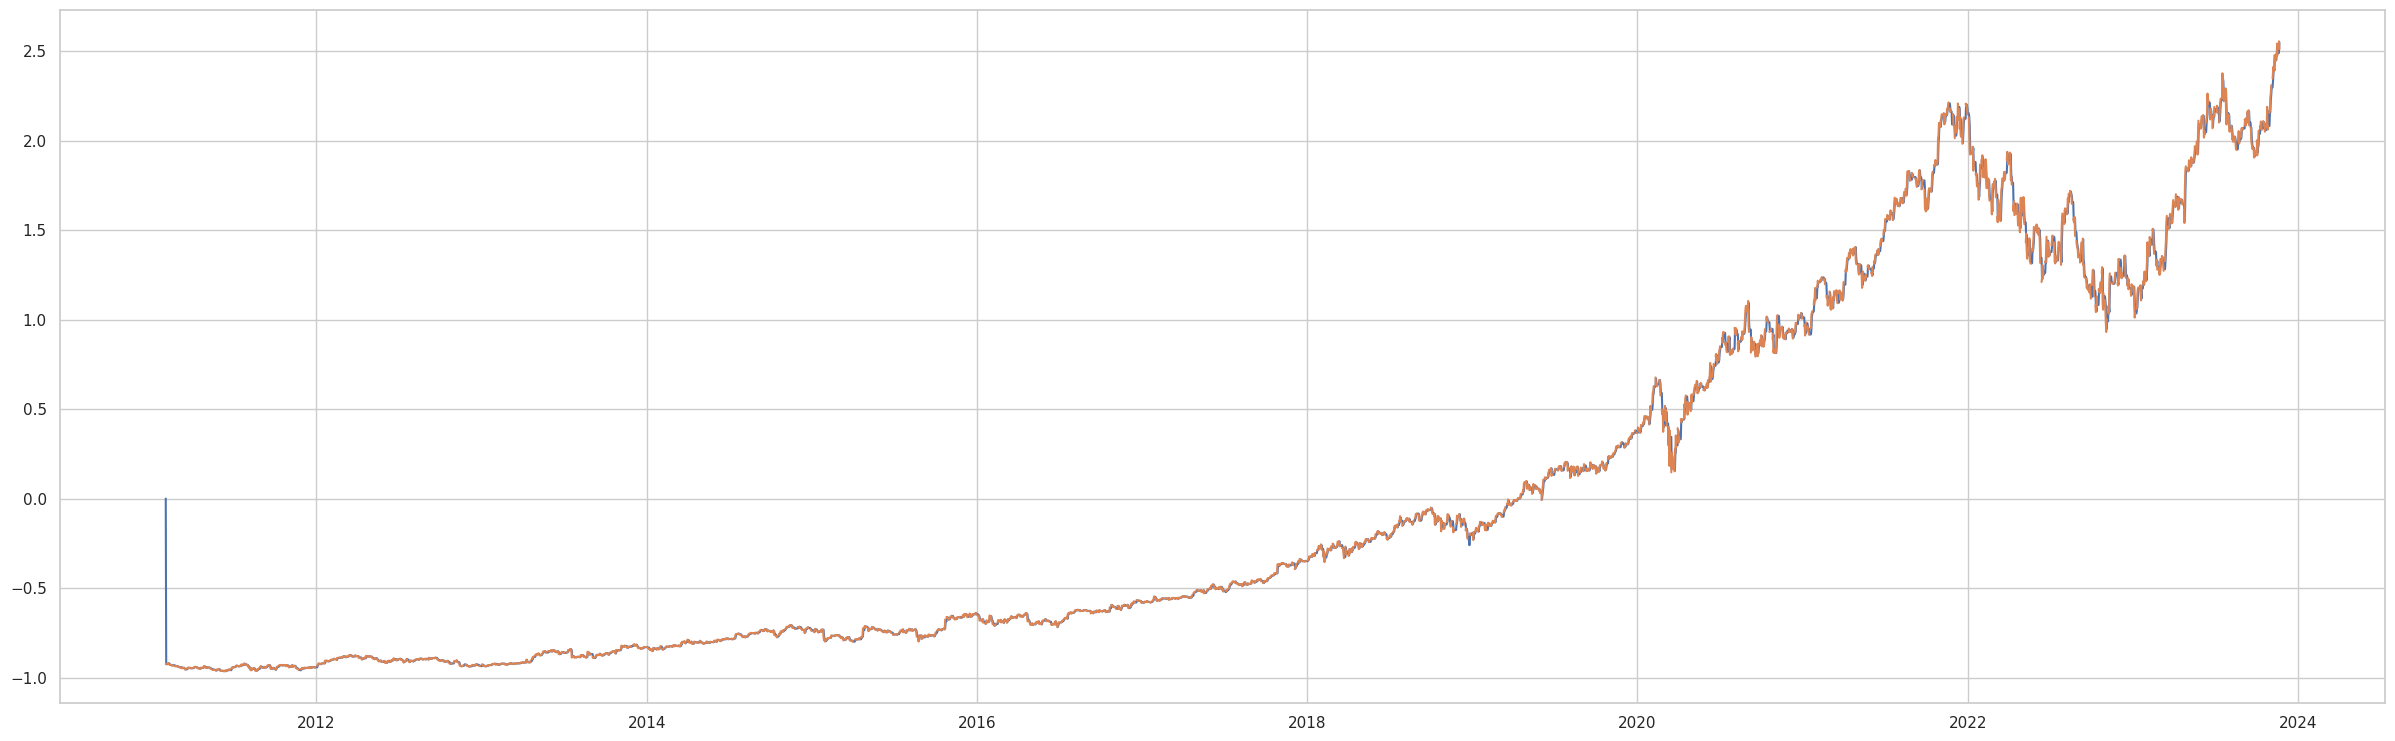

In [ ]:
plt.figure(figsize=(30, 9))
X=result.predict()
plt.plot(X,label='predicted')
plt.plot(df1,label='original')

plt.show()

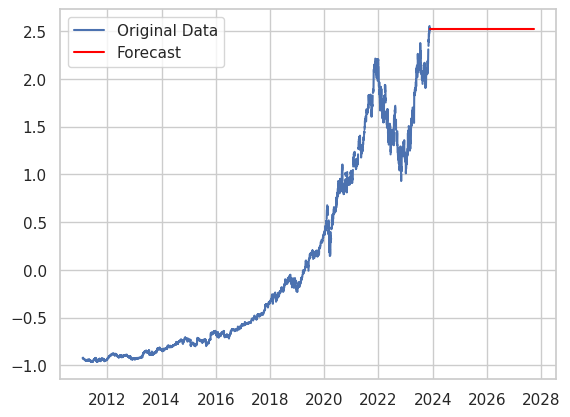

In [ ]:
forecast_steps = 1000
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df1.index[-1], periods=forecast_steps+1, freq='B')[1:]
forecast_values = forecast.predicted_mean

# Plot the original data and the forecast
plt.plot(df1['Close'], label='Original Data')
plt.plot(forecast_index, forecast_values, color='red', label='Forecast')
plt.legend()
plt.show()

ARTIFICIAL NEURAL NETWORK

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Next_Day_Closing_Price'

X = MSFT_standardized[features]
y = MSFT[target]

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
57/57 [==============================] - 5s 11ms/step - loss: 1700.4908 - val_loss: 12190.0596
Epoch 2/50
57/57 [==============================] - 1s 11ms/step - loss: 714.0975 - val_loss: 9225.5391
Epoch 3/50
57/57 [==============================] - 1s 10ms/step - loss: 534.1939 - val_loss: 6367.2300
Epoch 4/50
57/57 [==============================] - 1s 10ms/step - loss: 446.9727 - val_loss: 3332.3525
Epoch 5/50
57/57 [==============================] - 1s 11ms/step - loss: 383.5778 - val_loss: 2706.2419
Epoch 6/50
57/57 [==============================] - 1s 11ms/step - loss: 345.0652 - val_loss: 1894.2048
Epoch 7/50
57/57 [==============================] - 1s 10ms/step - loss: 296.7146 - val_loss: 1361.9110
Epoch 8/50
57/57 [==============================] - 1s 13ms/step - loss: 263.3870 - val_loss: 898.7495
Epoch 9/50
57/57 [==============================] - 1s 11ms/step - loss: 253.9814 - val_loss: 872.5821
Epoch 10/50
57/57 [==============================] - 1s 9ms/step

In [ ]:
loss = model.evaluate(X_train, y_train)
print(f'Mean Squared Error on Train Set: {loss}')

71/71 [==============================] - 0s 3ms/step - loss: 34.7799
Mean Squared Error on Train Set: 34.7798957824707


In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

31/31 [==============================] - 0s 2ms/step - loss: 308.5305
Mean Squared Error on Test Set: 308.5304870605469


In [ ]:
predictions = model.predict(X_test)

31/31 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
acc = r2_score(y_test ,predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2_score: {acc}')

Mean Squared Error: 308.5304535657256
Mean Absolute Error: 12.828866479315456
R2_score: 0.8828337311679715


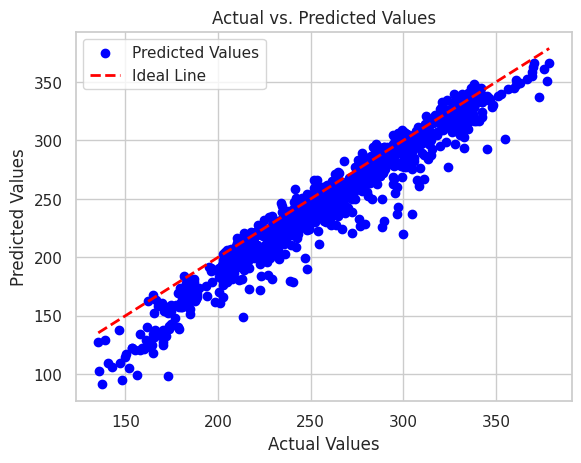

In [ ]:
plt.scatter(y_test, predictions, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

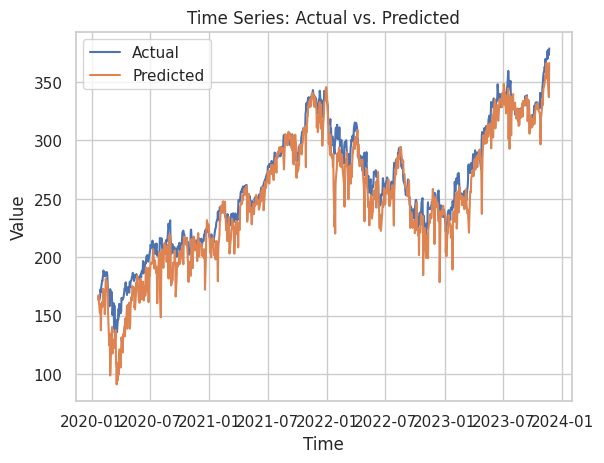

In [ ]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series: Actual vs. Predicted')
plt.legend()
plt.show()

EXPONENTIAL SMOOTHING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return', 'Close1', 'Close_2', 'Close_3']
target = 'Next_Day_Closing_Price'

X = MSFT_standardized[features]
y = MSFT[target]

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

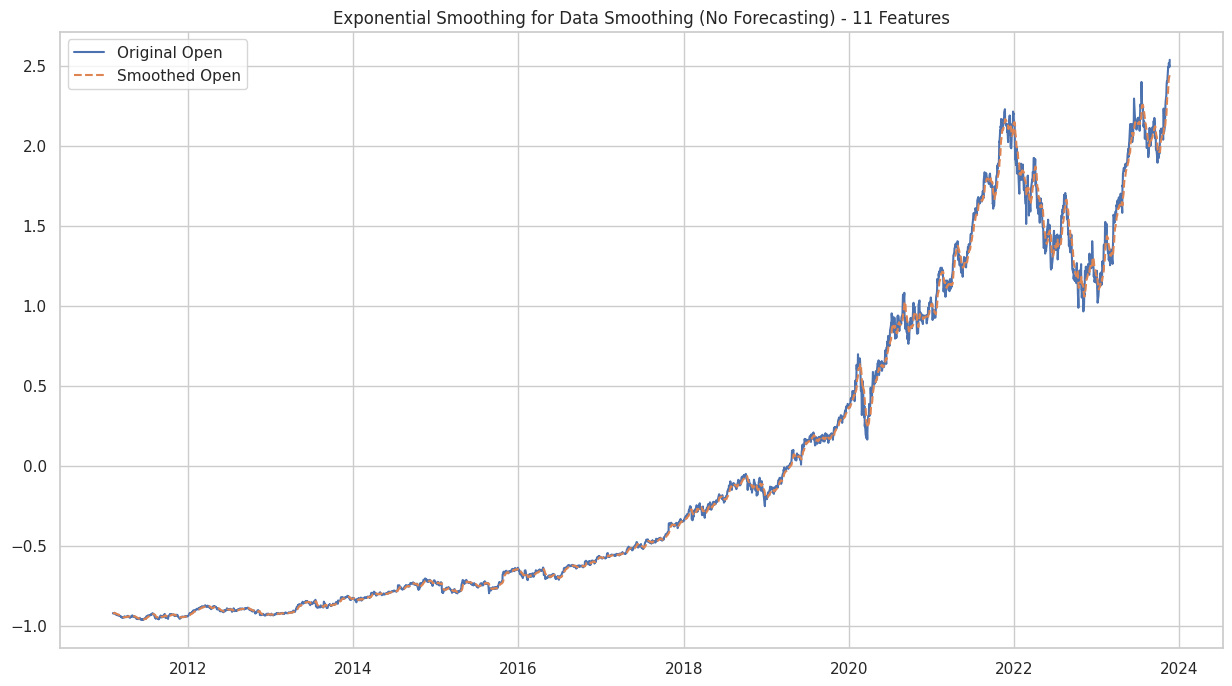

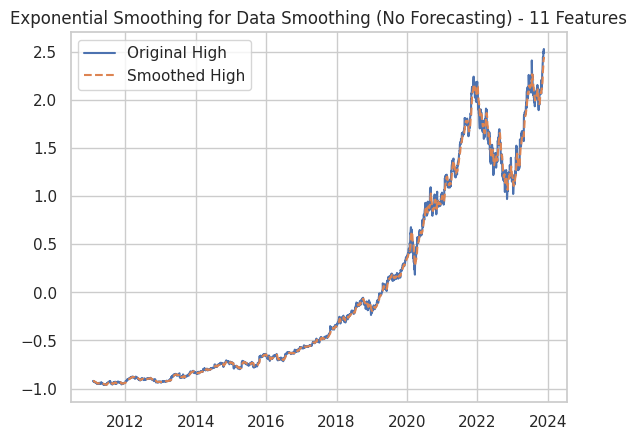

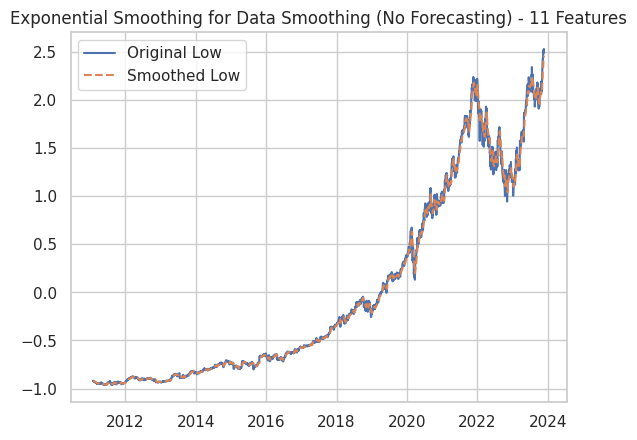

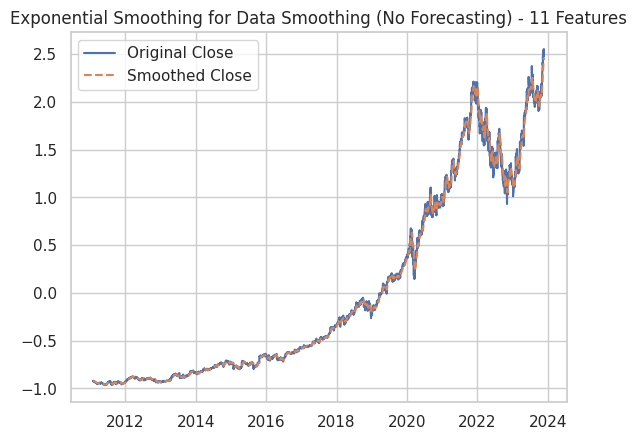

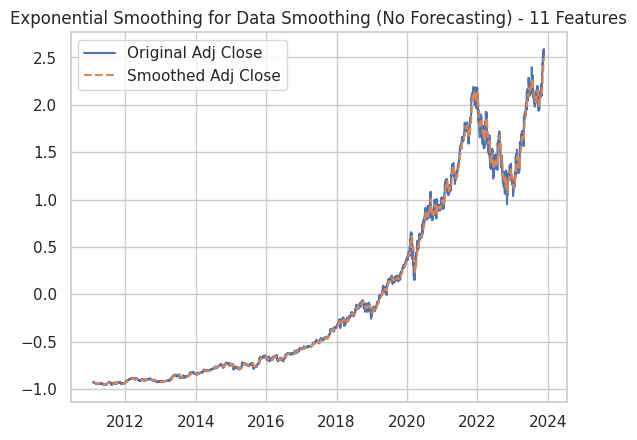

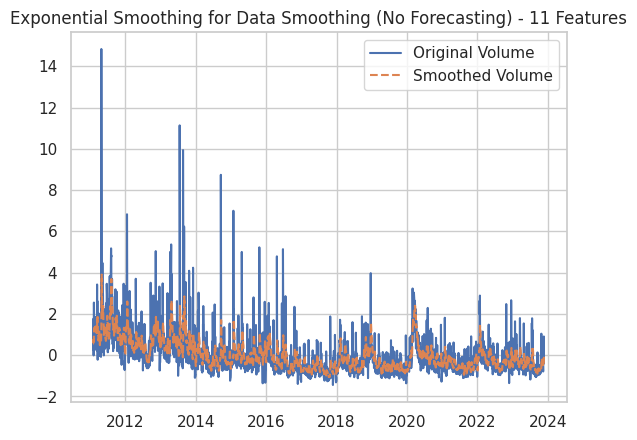

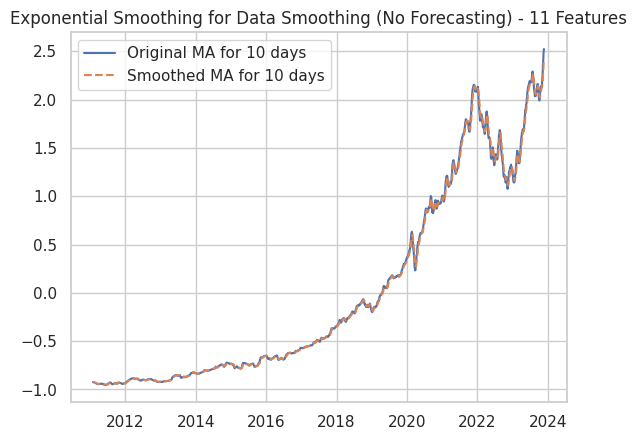

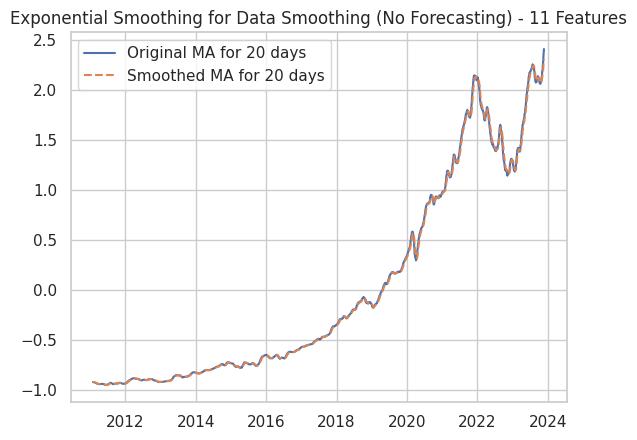

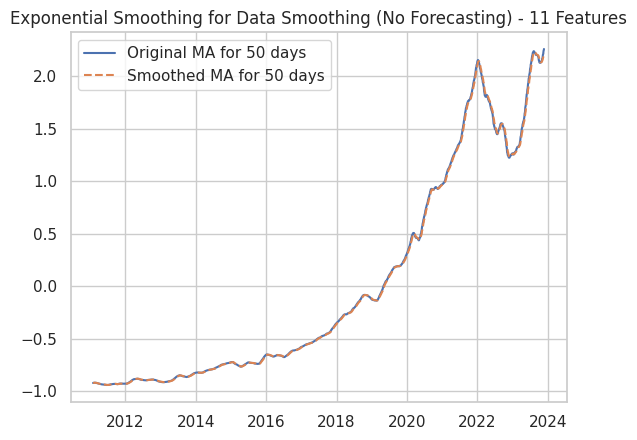

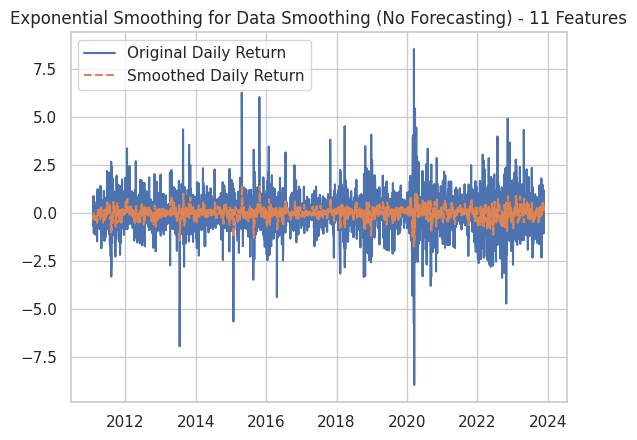

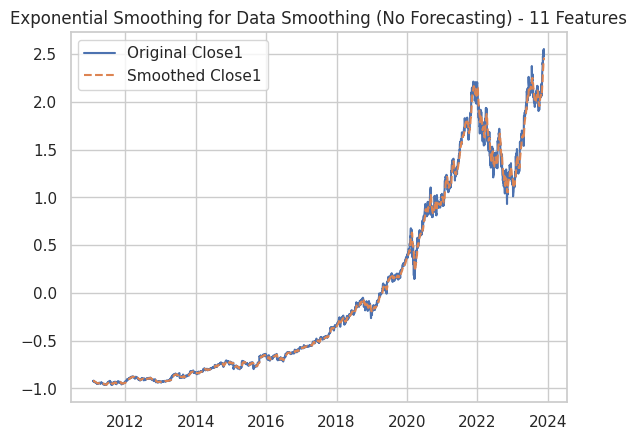

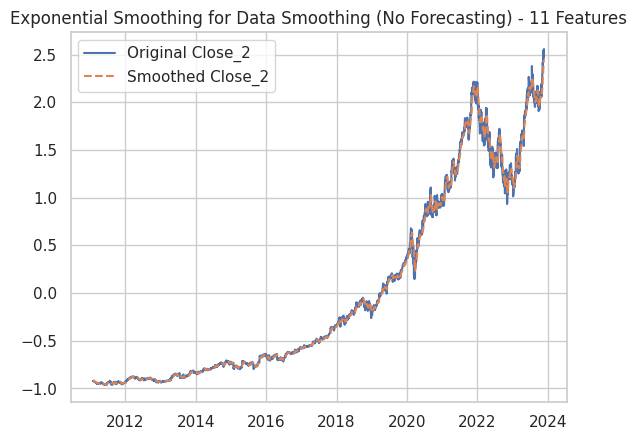

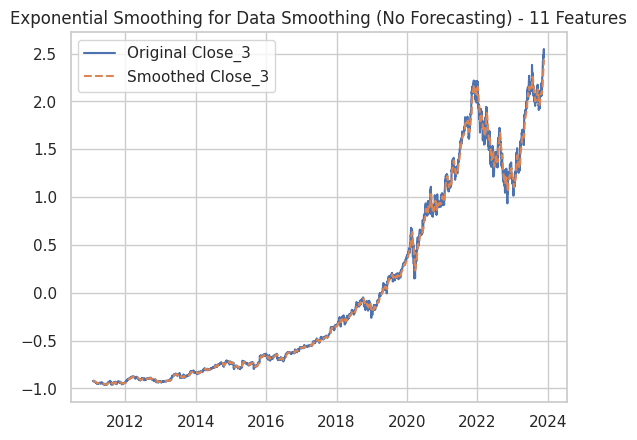

In [ ]:
alpha = 0.2  # Adjust as needed

# Apply Simple Exponential Smoothing without forecasting for each feature
smoothed_data = pd.DataFrame(index=MSFT_standardized.index)

for feature in features:
    smoothed_values = [MSFT_standardized[feature].iloc[0]]  # Initial value is the first data point

    # Apply the exponential smoothing formula to smooth the data
    for i in range(1, len(MSFT_standardized)):
        smoothed_values.append(alpha * MSFT_standardized[feature].iloc[i-1] + (1 - alpha) * smoothed_values[i-1])

    # Store the smoothed values in the DataFrame
    smoothed_data[feature] = smoothed_values

# Visualize the smoothed data for each feature
plt.figure(figsize=(15, 8))
for feature in features:
    plt.plot(MSFT_standardized[feature], label=f'Original {feature}')
    plt.plot(smoothed_data[feature], label=f'Smoothed {feature}', linestyle='dashed')
    plt.title('Exponential Smoothing for Data Smoothing (No Forecasting) - 11 Features')
    plt.legend()
    plt.show()

RANDOM FOREST REGRESSOR

In [ ]:

X = smoothed_data[features]
y = MSFT[target]

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0 , max_depth = 5)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [ ]:
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

Train data prediction: (2256, 1)
Test data prediction: (967, 1)


In [ ]:
import math

In [ ]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Test data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

Train data RMSE:  1.4265569008944
Train data MSE:  2.035064591489435
Test data MAE:  1.0000730900423274
-------------------------------------------------------------------------------------
Test data RMSE:  109.61388296409523
Test data MSE:  12015.203338466365
Test data MAE:  97.45033524250525


In [ ]:
print("Train data R2 score:", r2_score(y_train, train_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Train data R2 score: 0.9997384181415947
Test data R2 score: -3.455342476680081


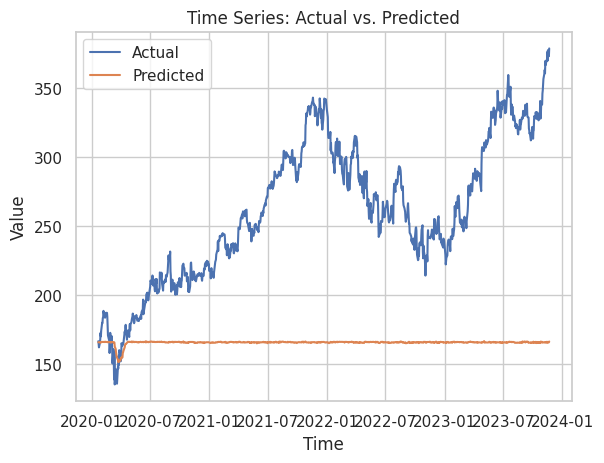

In [ ]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, test_predict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series: Actual vs. Predicted')
plt.legend()
plt.show()

DECISION TREE

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Build the Decision Tree model
dt_model = DecisionTreeRegressor()

# Define the hyperparameters to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [5, 10, 15],
    'max_features': [ 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding mean squared error
print(f'Best Hyperparameters: {grid_result.best_params_}')

# Use the best model for predictions
best_dt_model = grid_result.best_estimator_
predictions = best_dt_model.predict(X_test)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 20}


In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 12077.643622187876


In [ ]:
feature_importance = best_dt_model.feature_importances_
feature_names = MSFT_standardized.columns

# Print or plot feature importance
for feature, importance in zip(feature_names, feature_importance):
    print(f'{feature}: {importance}')


Open: 0.0012774311126390505
High: 0.0008799703926136034
Low: 0.013432348092023592
Close: 0.0003348703523805994
Volume: 0.08921952818284312
Daily Return: 2.9497160717134472e-06
Adj Close: 0.7989702328465382
MA for 10 days: 0.00018836499182143558
MA for 20 days: 0.02182066291835994
MA for 50 days: 1.9134504778127812e-05
Close1: 0.00047968576952341833
Close_2: 0.07337356365371697
Close_3: 1.257466689984561e-06


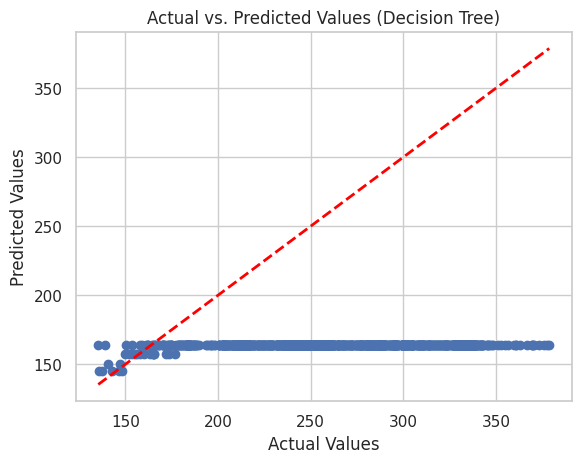

In [ ]:
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Decision Tree)')
plt.show()

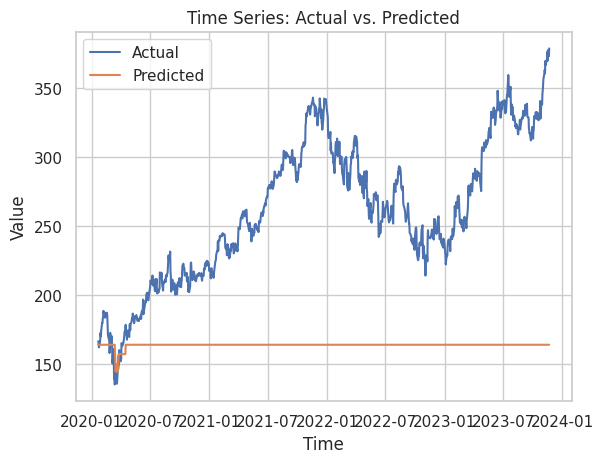

In [ ]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series: Actual vs. Predicted')
plt.legend()
plt.show()